# Chapter 9 - R Exercises

In [1]:
library(tidyverse)
library(bayesrules)
library(bayesplot)
library(rstan)
library(rstanarm)
library(grid)
library(gridExtra)
library(janitor)
library(broom.mixed)
library(tidybayes)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting

Loading required package: StanHeaders

rstan (Version 2.21.8, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recomp

## Exercise 9.5

### a)

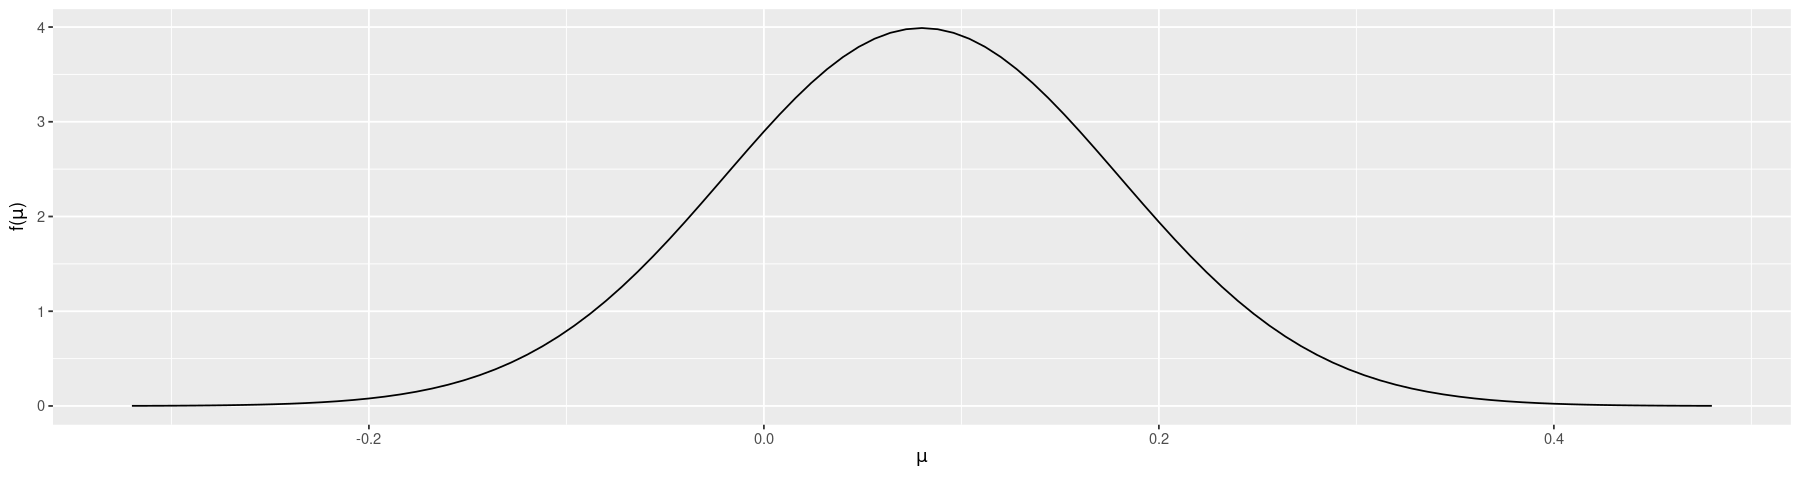

In [2]:
options(repr.plot.width=15, repr.plot.height=4)
plot_normal(mean = 0.08, sd=0.1)

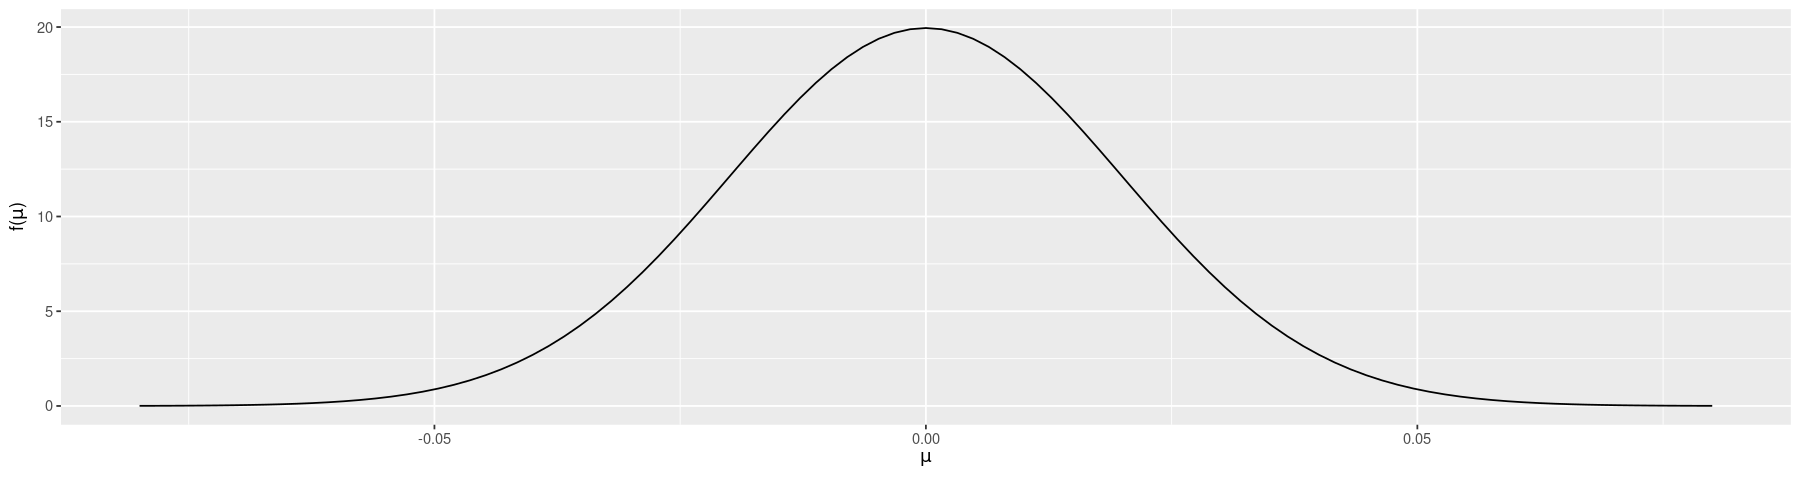

In [3]:
plot_normal(mean = 0, sd=0.02)

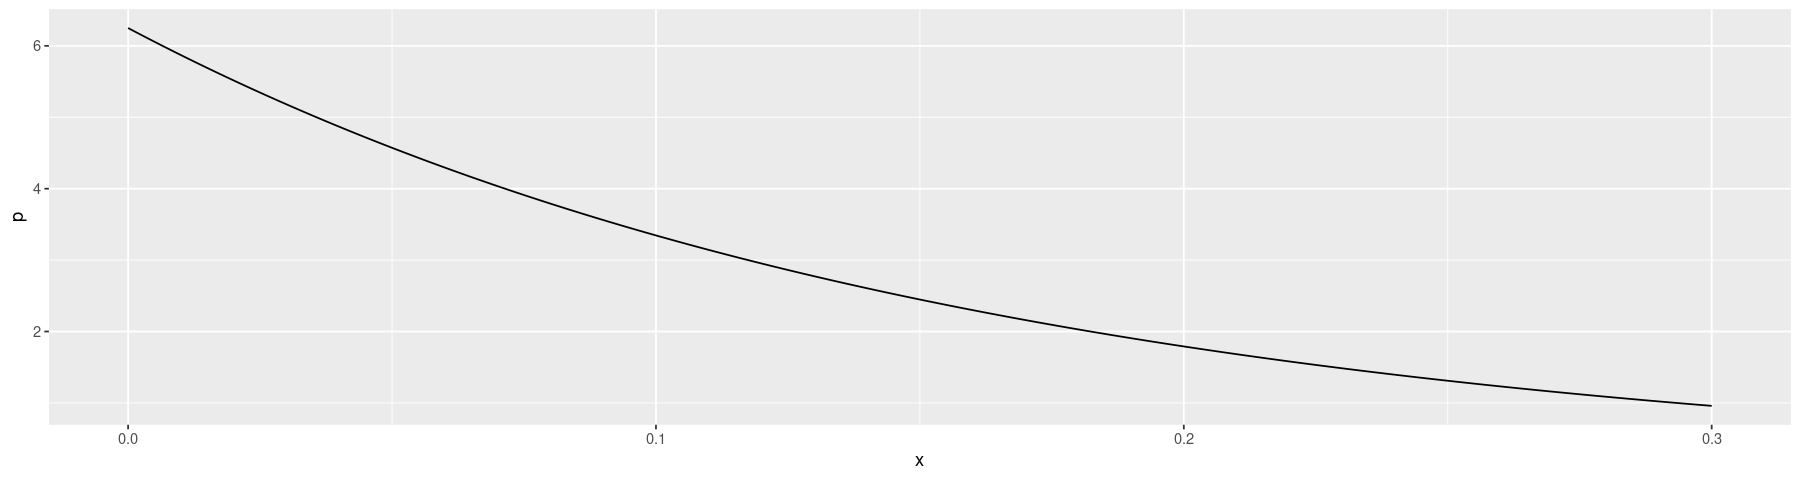

In [4]:
x <- seq(0,0.3,0.001)
ggplot( data.frame(x=x, p=dexp( x, rate=6.25 ) ) ) + geom_line( aes(x=x, y=p))

## Exercise 9.6

### a)

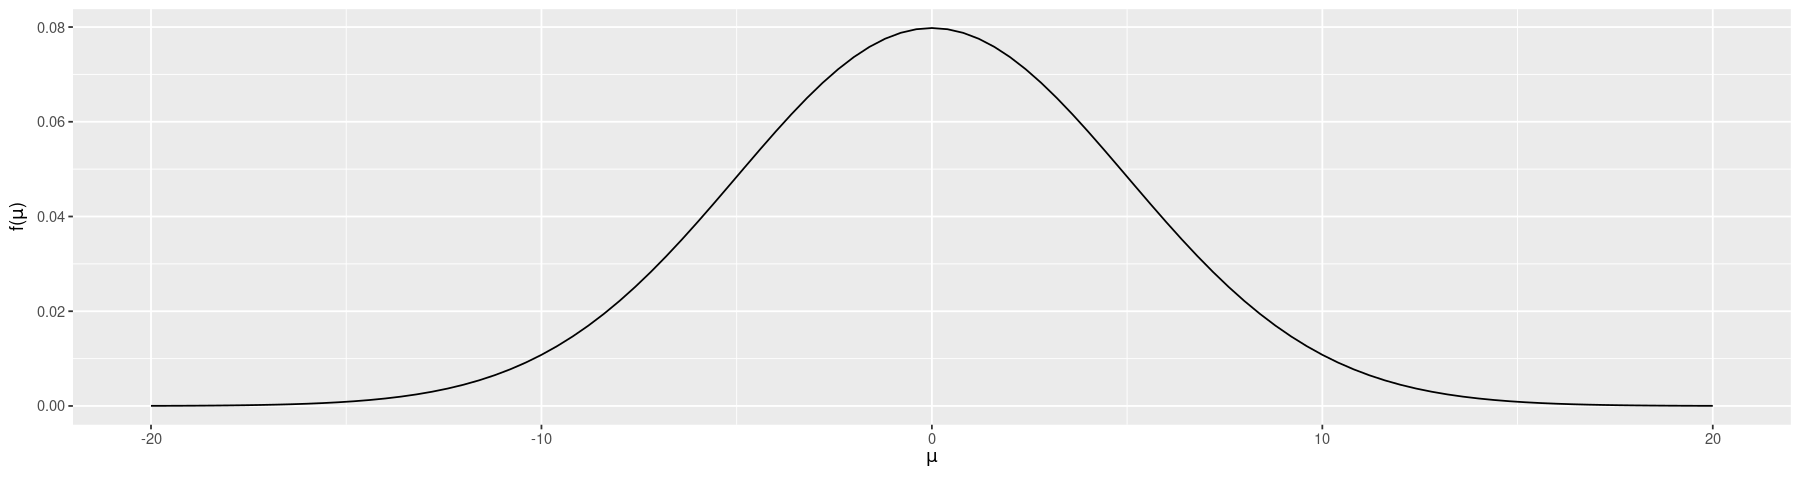

In [5]:
options(repr.plot.width=15, repr.plot.height=4)
plot_normal(mean = 0, sd=5)

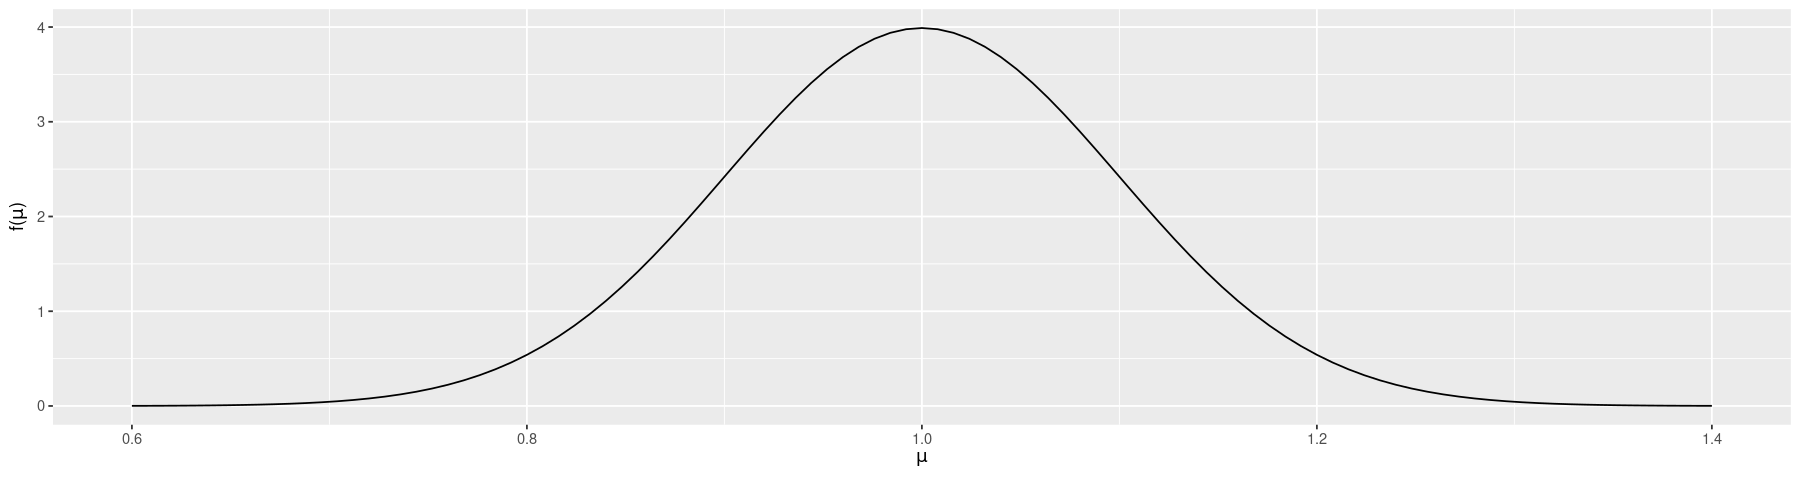

In [6]:
plot_normal(mean = 1, sd=0.1)

## Exercise 9.9

### a)

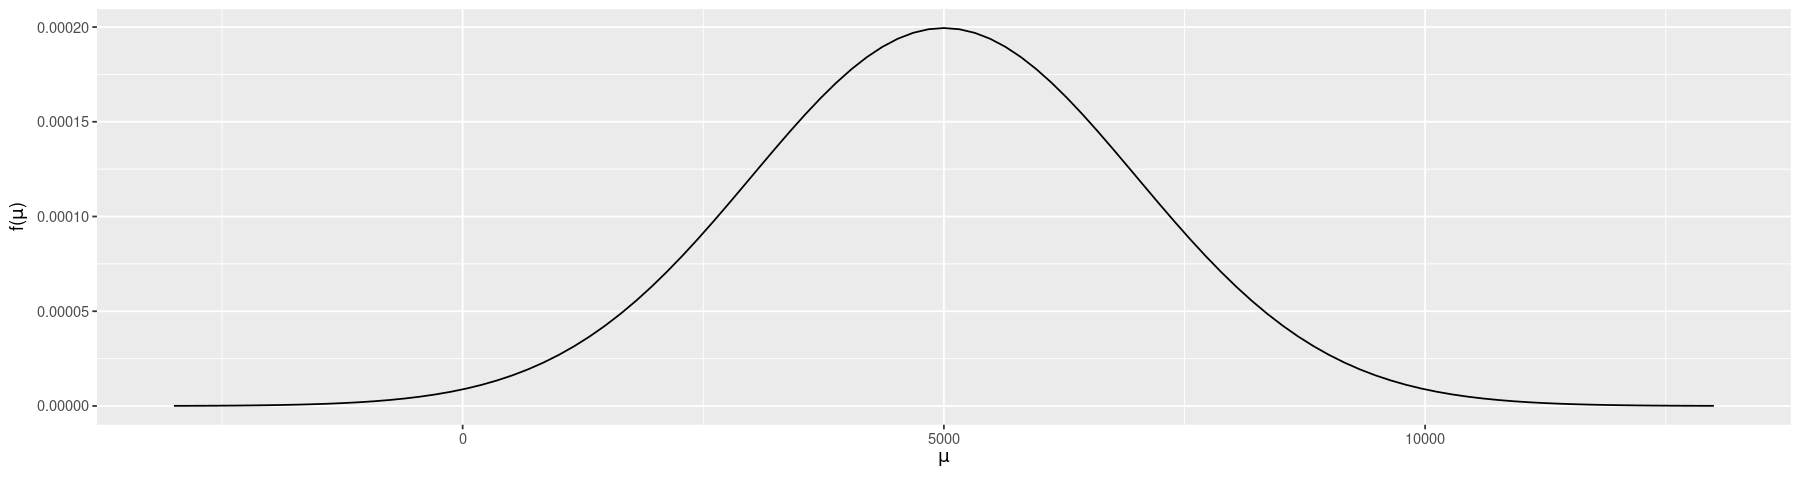

In [7]:
plot_normal(mean = 5000, sd = 2000)

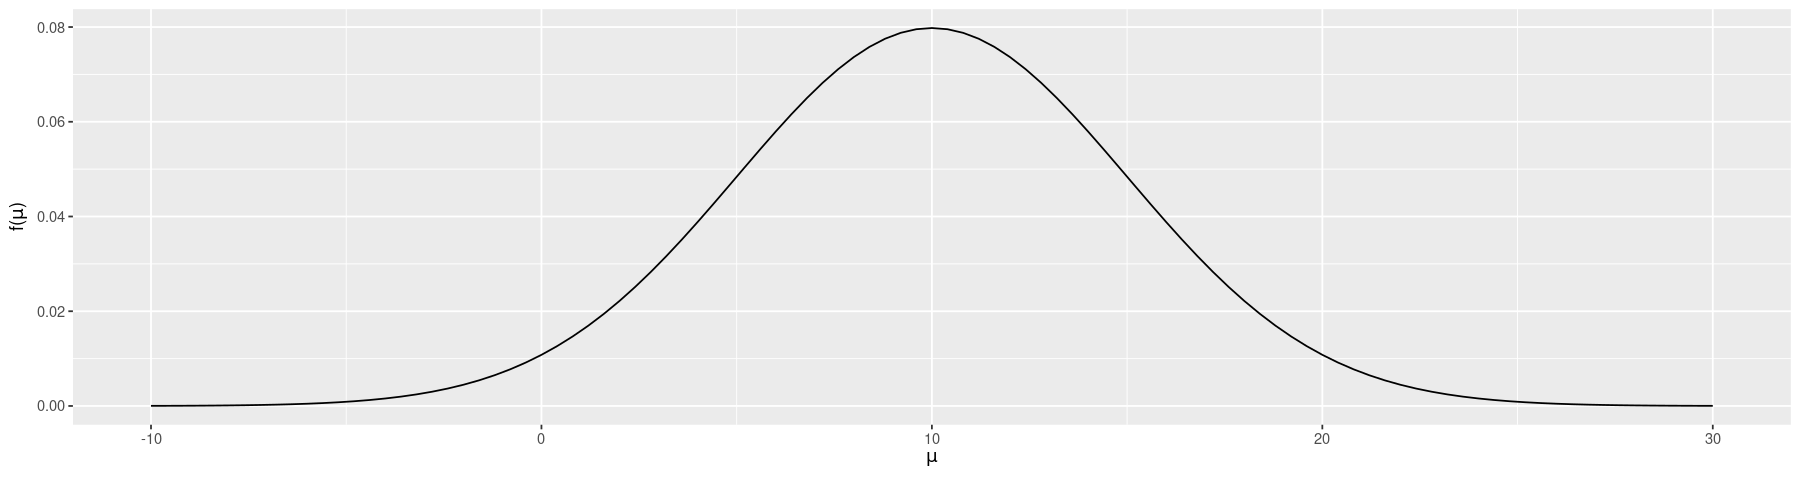

In [8]:
plot_normal(mean = 10, sd = 5)

### b)

In [9]:
bike_humidity_model_prior <- stan_glm(
  rides ~ humidity, data = bikes, 
  family = gaussian,
  prior_intercept = normal(5000, 2000),
  prior = normal(10, 5), 
  prior_aux = exponential(1/2000),
  chains = 5, iter = 4000*2, seed = 84735, prior_PD = TRUE)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 8000 [  0%]  (Warmup)
Chain 1: Iteration:  800 / 8000 [ 10%]  (Warmup)
Chain 1: Iteration: 1600 / 8000 [ 20%]  (Warmup)
Chain 1: Iteration: 2400 / 8000 [ 30%]  (Warmup)
Chain 1: Iteration: 3200 / 8000 [ 40%]  (Warmup)
Chain 1: Iteration: 4000 / 8000 [ 50%]  (Warmup)
Chain 1: Iteration: 4001 / 8000 [ 50%]  (Sampling)
Chain 1: Iteration: 4800 / 8000 [ 60%]  (Sampling)
Chain 1: Iteration: 5600 / 8000 [ 70%]  (Sampling)
Chain 1: Iteration: 6400 / 8000 [ 80%]  (Sampling)
Chain 1: Iteration: 7200 / 8000 [ 90%]  (Sampling)
Chain 1: Iteration: 8000 / 8000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.24437 seconds (Warm-up)
Chain 1:                0.040126 seconds (Sampling)
Chain 1:               

### c)

Warning message:
“`fitted_draws` and `add_fitted_draws` are deprecated as their names were confusing.
- Use [add_]epred_draws() to get the expectation of the posterior predictive.
- Use [add_]linpred_draws() to get the distribution of the linear predictor.
- For example, you used [add_]fitted_draws(..., scale = "response"), which
  means you most likely want [add_]epred_draws(...).
NOTE: When updating to the new functions, note that the `model` parameter is now
  named `object` and the `n` parameter is now named `ndraws`.”


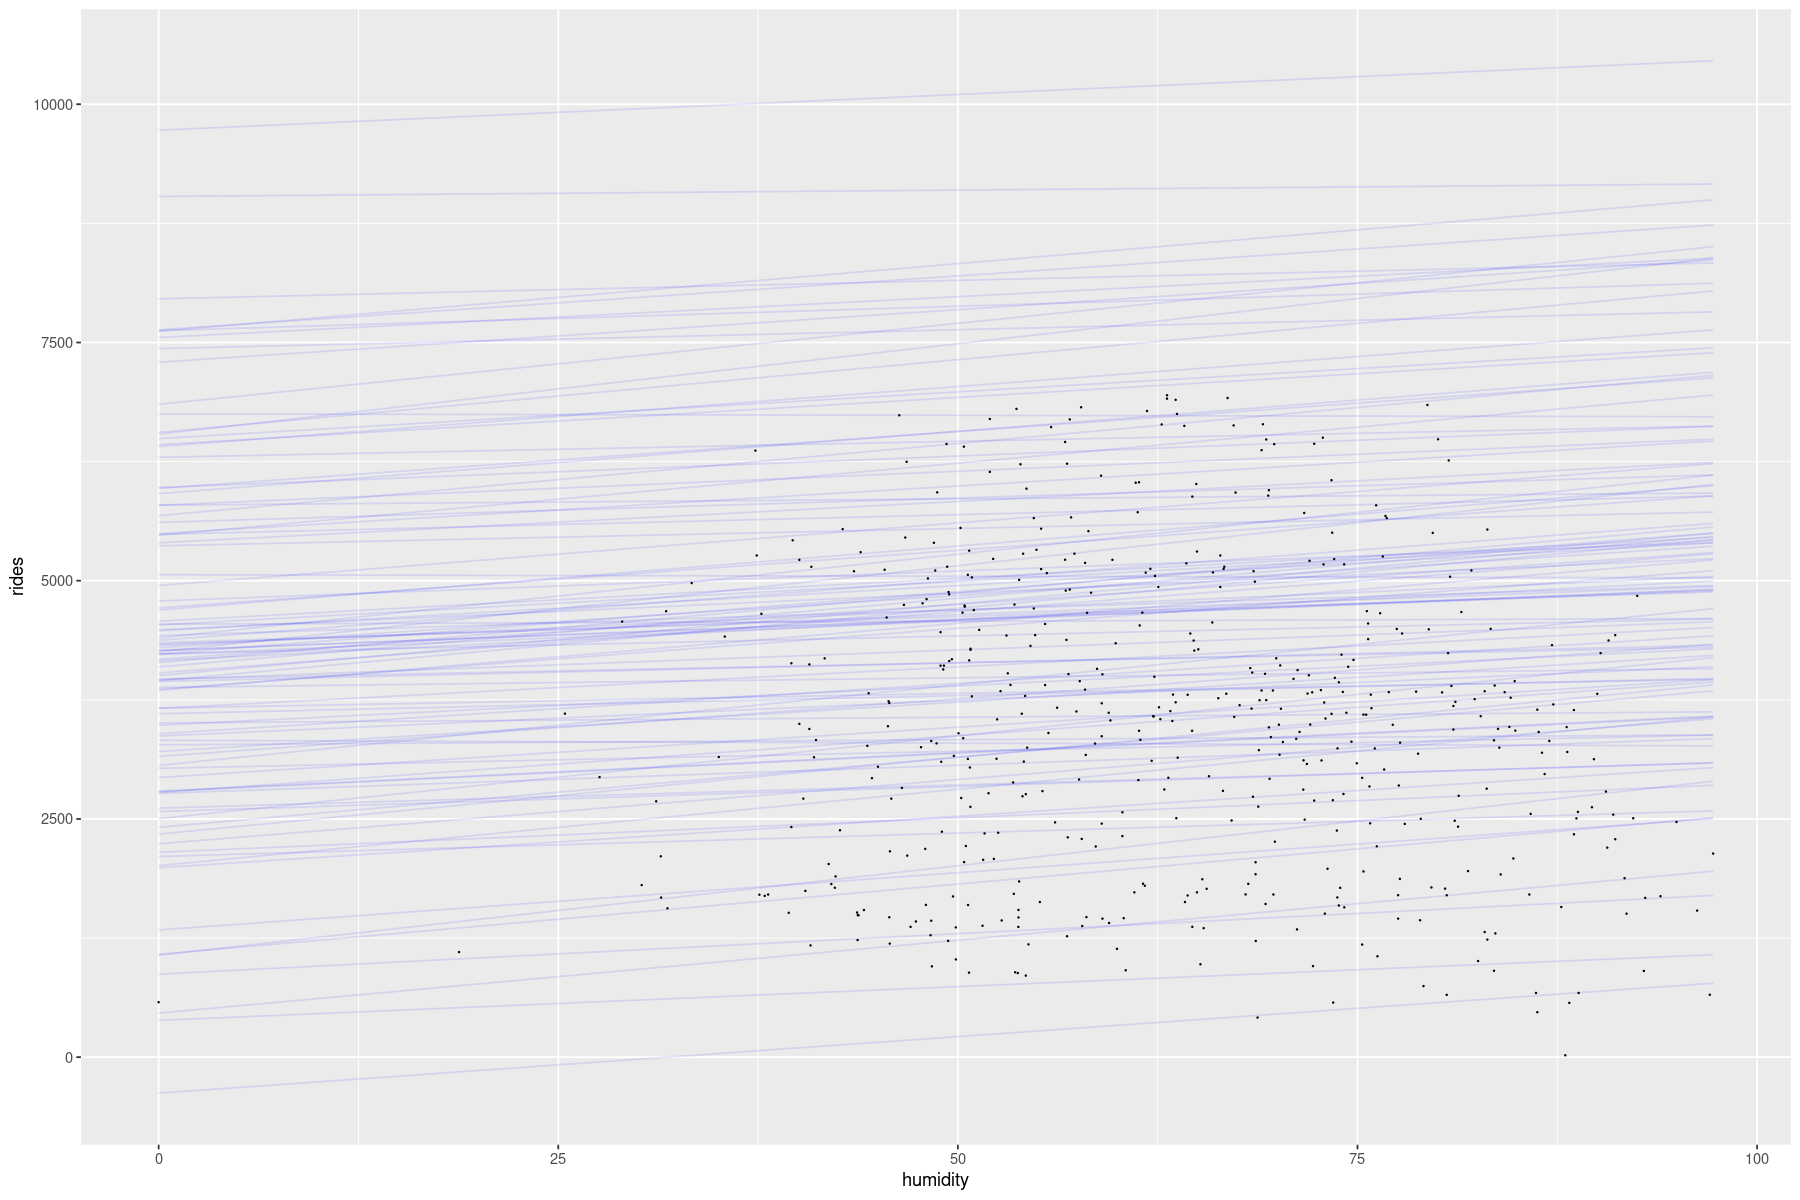

In [10]:
library(tidybayes)
options(repr.plot.width=15, repr.plot.height=10)
bikes %>%
  add_fitted_draws(bike_humidity_model_prior, n = 100) %>%
  ggplot(aes(x = humidity, y = rides)) +
    geom_line(aes(y = .value, group = .draw), alpha = 0.1, col = "blue") + 
    geom_point(data = bikes, size = 0.05)

Warning message:
“
In add_predicted_draws(): The `n` argument is a deprecated alias for `ndraws`.
Use the `ndraws` argument instead.
See help("tidybayes-deprecated").
”


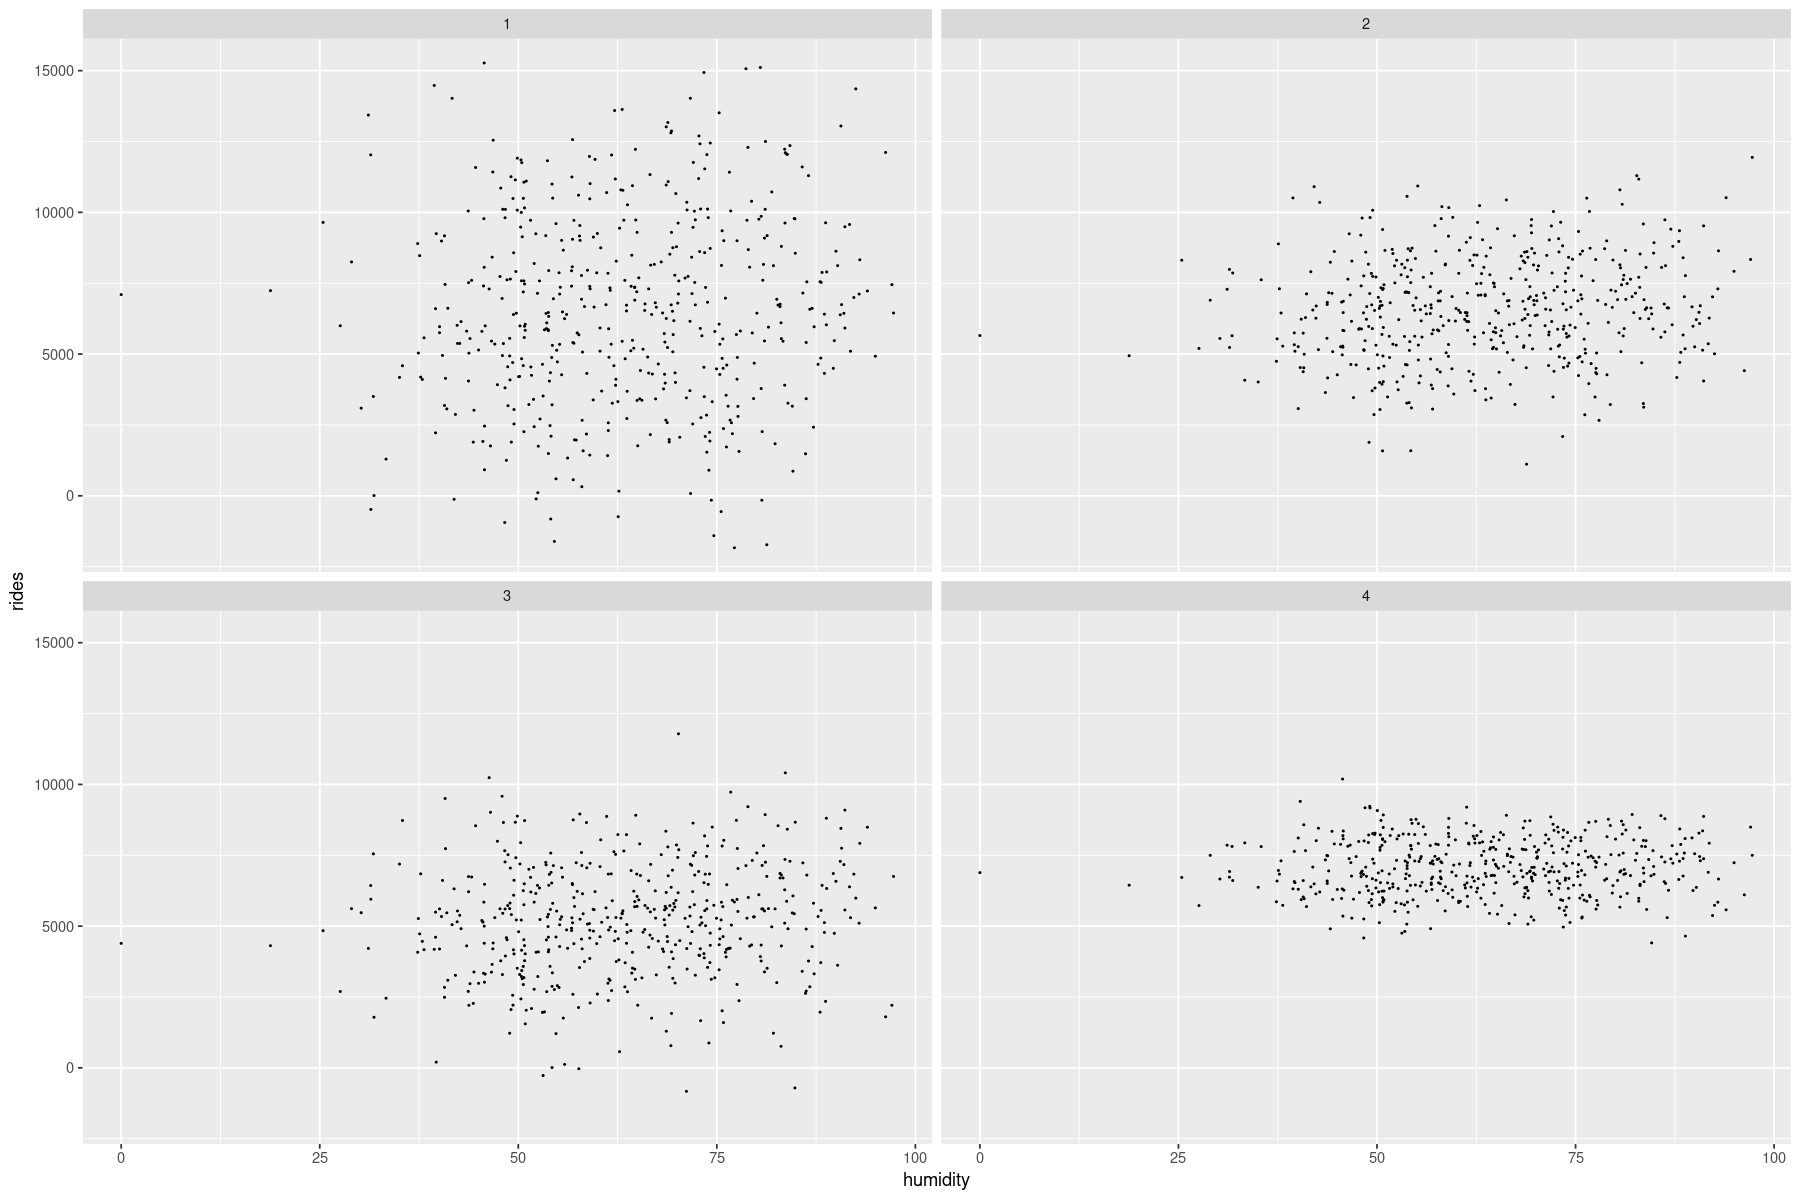

In [11]:
bikes %>%
  add_predicted_draws(bike_humidity_model_prior, n = 4) %>%
  ggplot(aes(x = humidity, y = rides)) +
    geom_point(aes(y = .prediction, group = .draw), size = 0.2) + 
    facet_wrap(~ .draw)

Four samples from exponential distribution for prior on sigma:

In [12]:
rexp(4, rate=1/2000)

[1] 4986.6258 1609.1900  996.2504 4854.5003

## Exercise 9.10

### a)

`geom_smooth()` using formula = 'y ~ x'


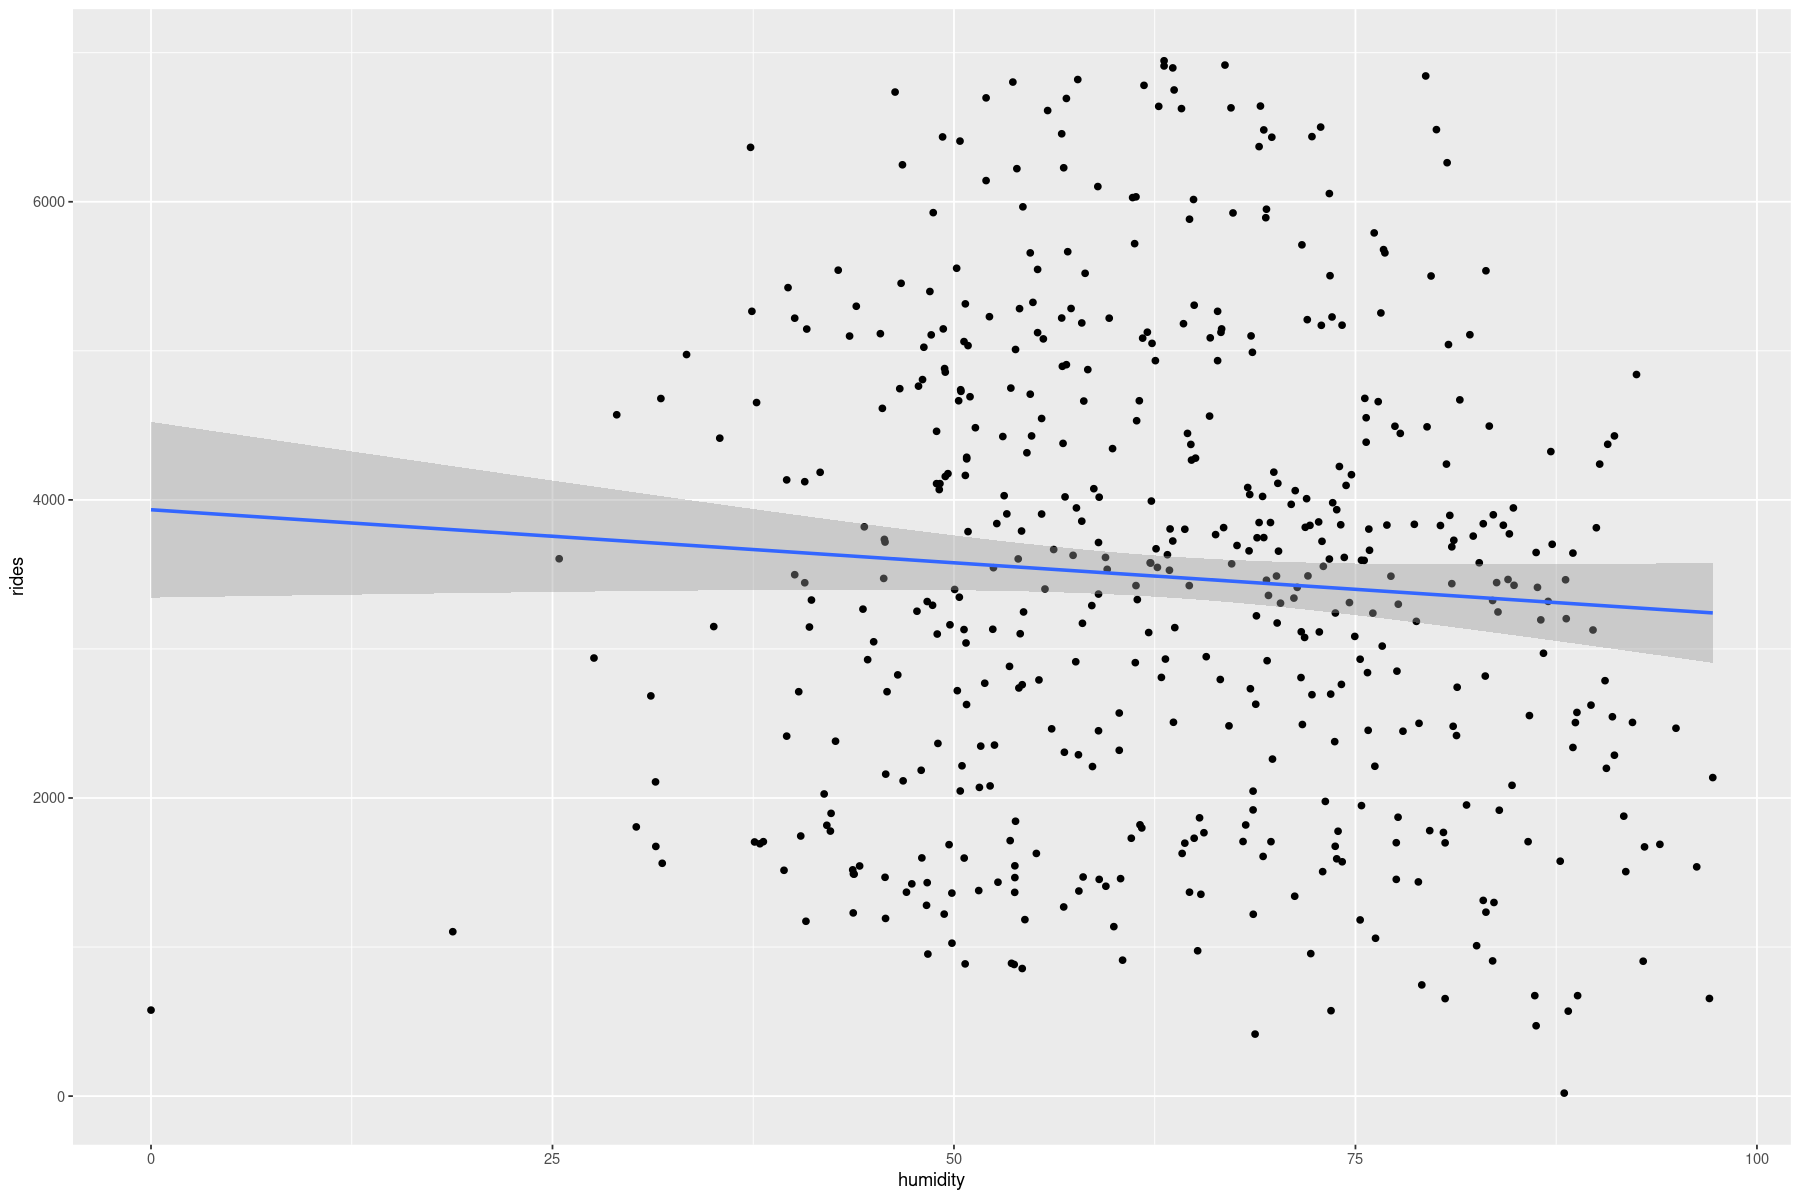

In [13]:
ggplot( bikes, aes(x=humidity, y=rides) ) + geom_point() + geom_smooth( method="lm" )

### b)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


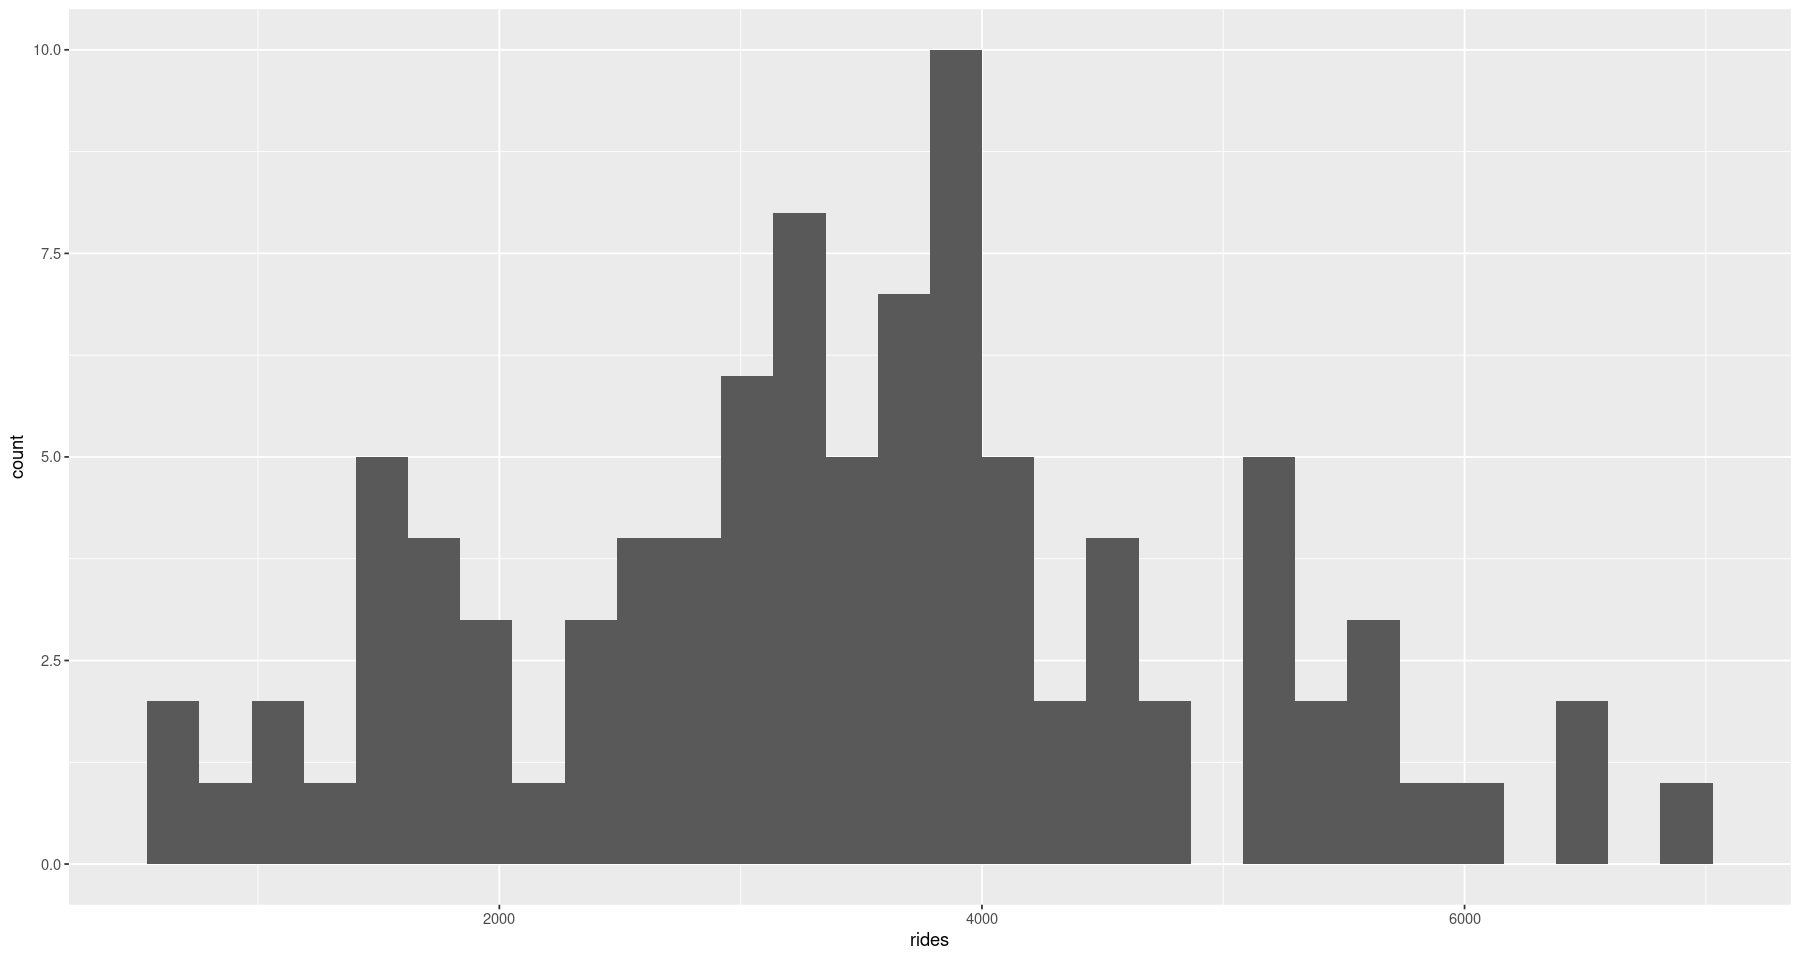

In [14]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot( bikes %>% filter( humidity > 70, humidity < 80), aes(x=rides) ) + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


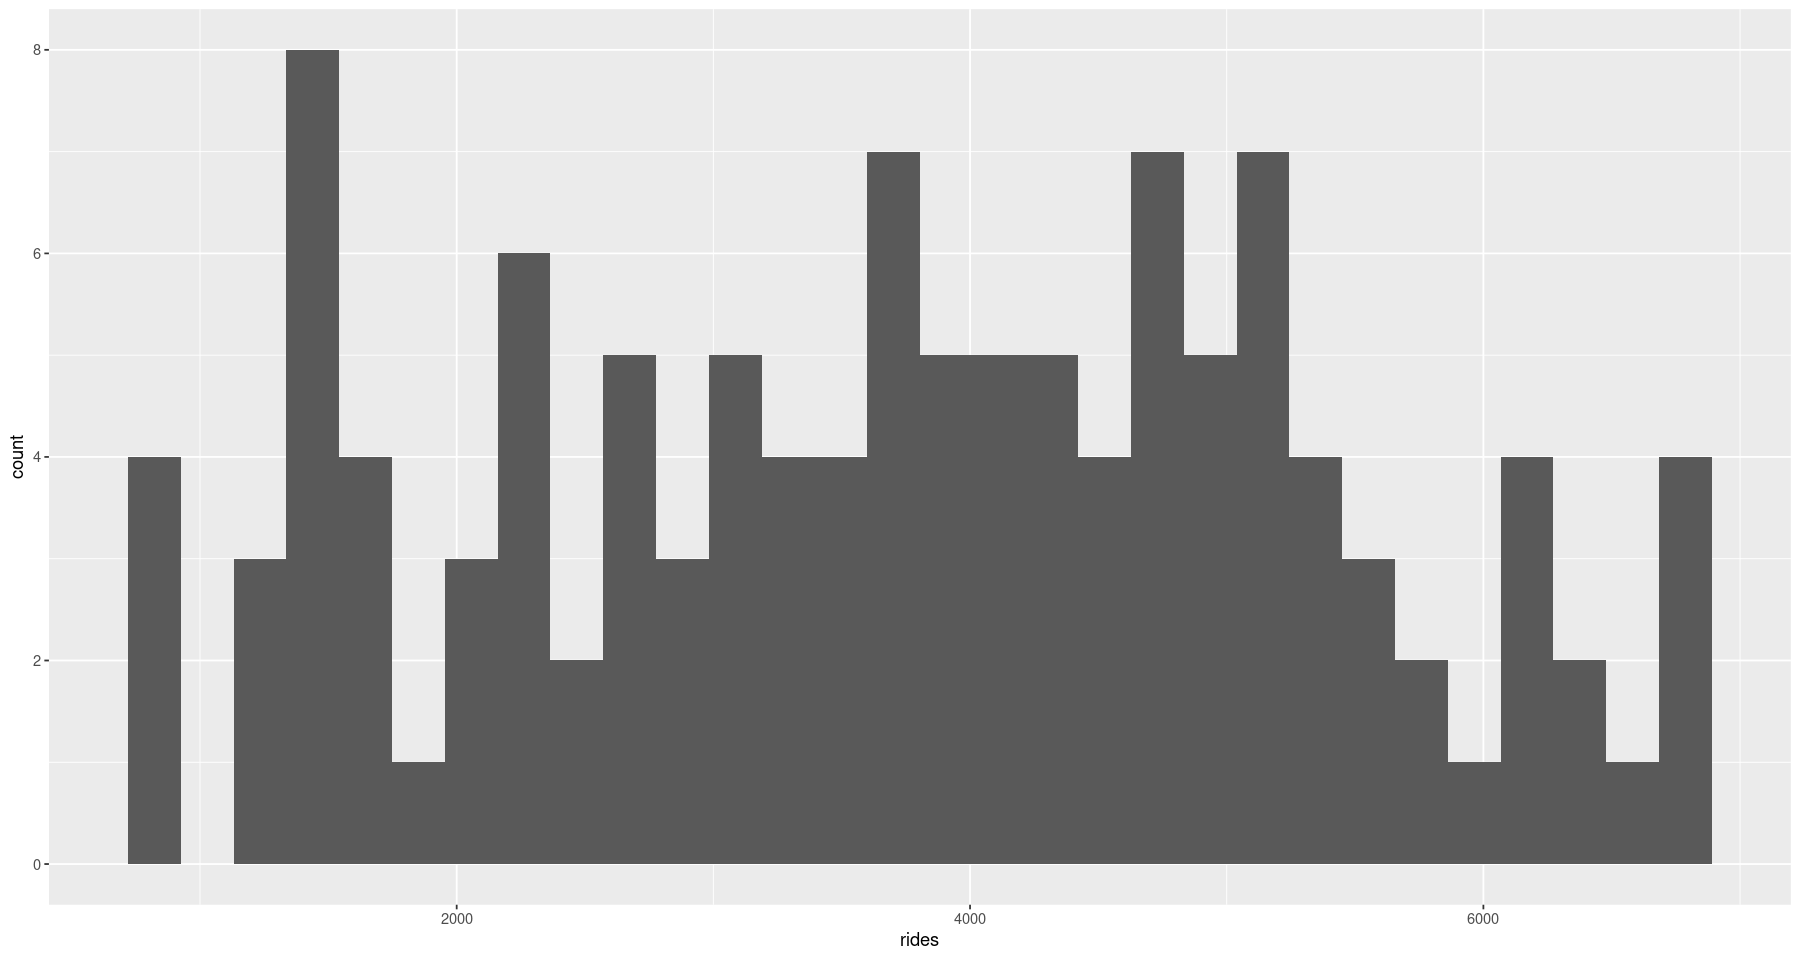

In [15]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot( bikes %>% filter( humidity > 50, humidity < 60), aes(x=rides) ) + geom_histogram()

The variance due to noise is extremely large, so the choice of a low-variance linear model is the best. The distributions of Y along different regions of X look to some approximation normal, so one can try with a normal model, even though this assumption is not perfect. The variance appears to be more or less constant along the x-axis.

## Exercise 9.11

In [16]:
bike_humidity_model <- stan_glm(
  rides ~ humidity, data = bikes, 
  family = gaussian,
  prior_intercept = normal(5000, 2000),
  prior = normal(10, 5), 
  prior_aux = exponential(1/2000),
  chains = 5, iter = 4000*2, seed = 84735, prior_PD = FALSE)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 8000 [  0%]  (Warmup)
Chain 1: Iteration:  800 / 8000 [ 10%]  (Warmup)
Chain 1: Iteration: 1600 / 8000 [ 20%]  (Warmup)
Chain 1: Iteration: 2400 / 8000 [ 30%]  (Warmup)
Chain 1: Iteration: 3200 / 8000 [ 40%]  (Warmup)
Chain 1: Iteration: 4000 / 8000 [ 50%]  (Warmup)
Chain 1: Iteration: 4001 / 8000 [ 50%]  (Sampling)
Chain 1: Iteration: 4800 / 8000 [ 60%]  (Sampling)
Chain 1: Iteration: 5600 / 8000 [ 70%]  (Sampling)
Chain 1: Iteration: 6400 / 8000 [ 80%]  (Sampling)
Chain 1: Iteration: 7200 / 8000 [ 90%]  (Sampling)
Chain 1: Iteration: 8000 / 8000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.136099 seconds (Warm-up)
Chain 1:                0.139633 seconds (Sampling)
Chain 1:              

Trace plot:

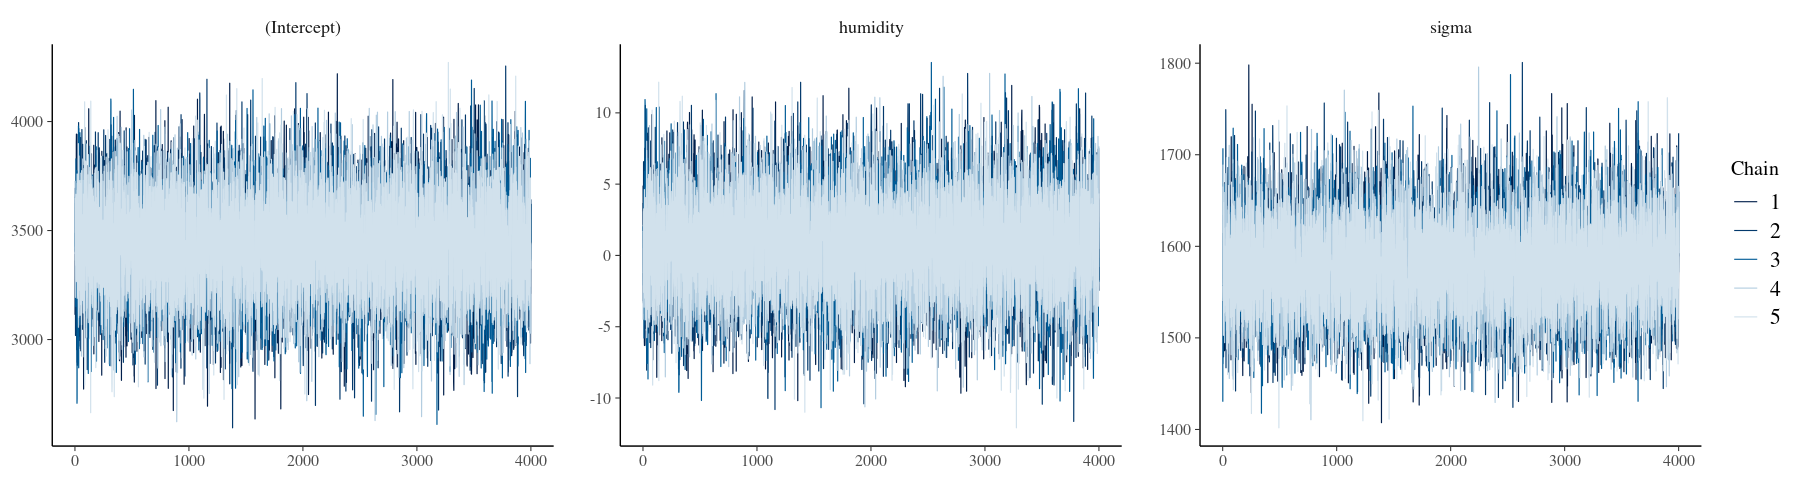

In [17]:
options(repr.plot.width=15, repr.plot.height=4)
mcmc_trace( bike_humidity_model )

It looks like the chains have mixed.

Densities:

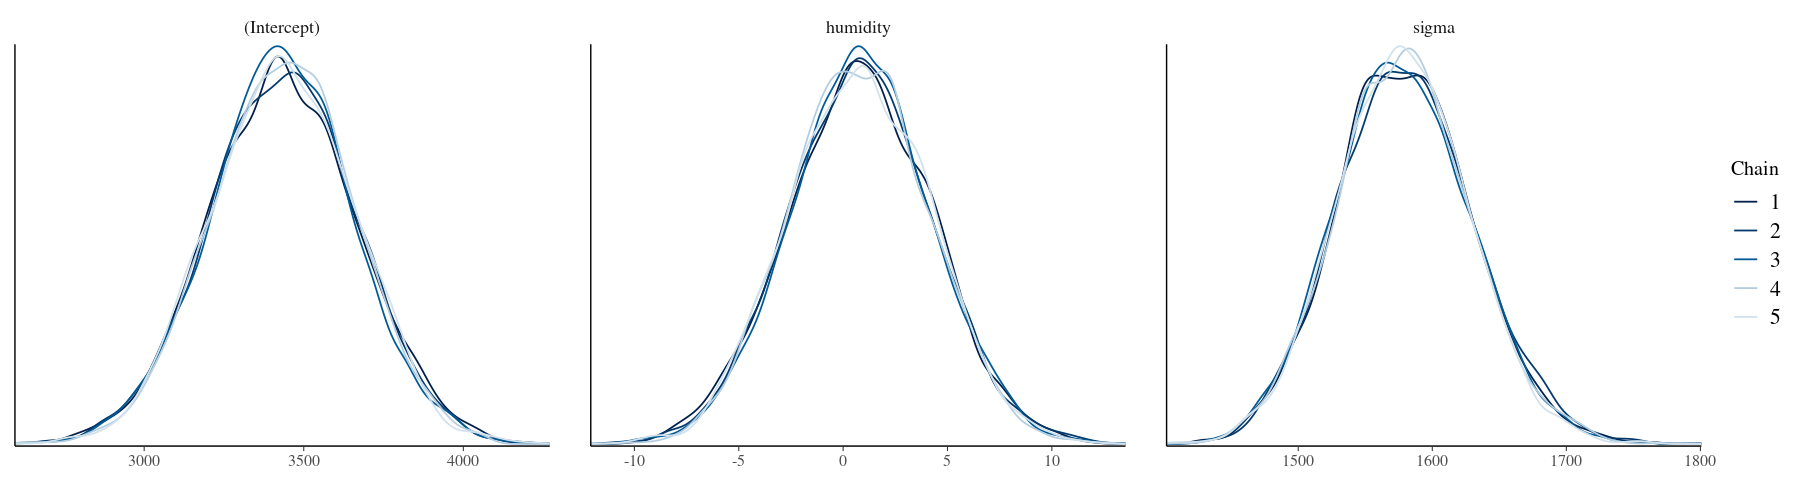

In [18]:
mcmc_dens_overlay( bike_humidity_model )

Same here. Then probably Rhat is close to 1:

In [19]:
rhat( bike_humidity_model )

(Intercept)    humidity       sigma 
  0.9999064   0.9998893   1.0002224

Autocorrelation:

Warning message:
“The `facets` argument of `facet_grid()` is deprecated as of ggplot2 2.2.0.
ℹ Please use the `rows` argument instead.
ℹ The deprecated feature was likely used in the bayesplot package.
  Please report the issue at <https://github.com/stan-dev/bayesplot/issues/>.”


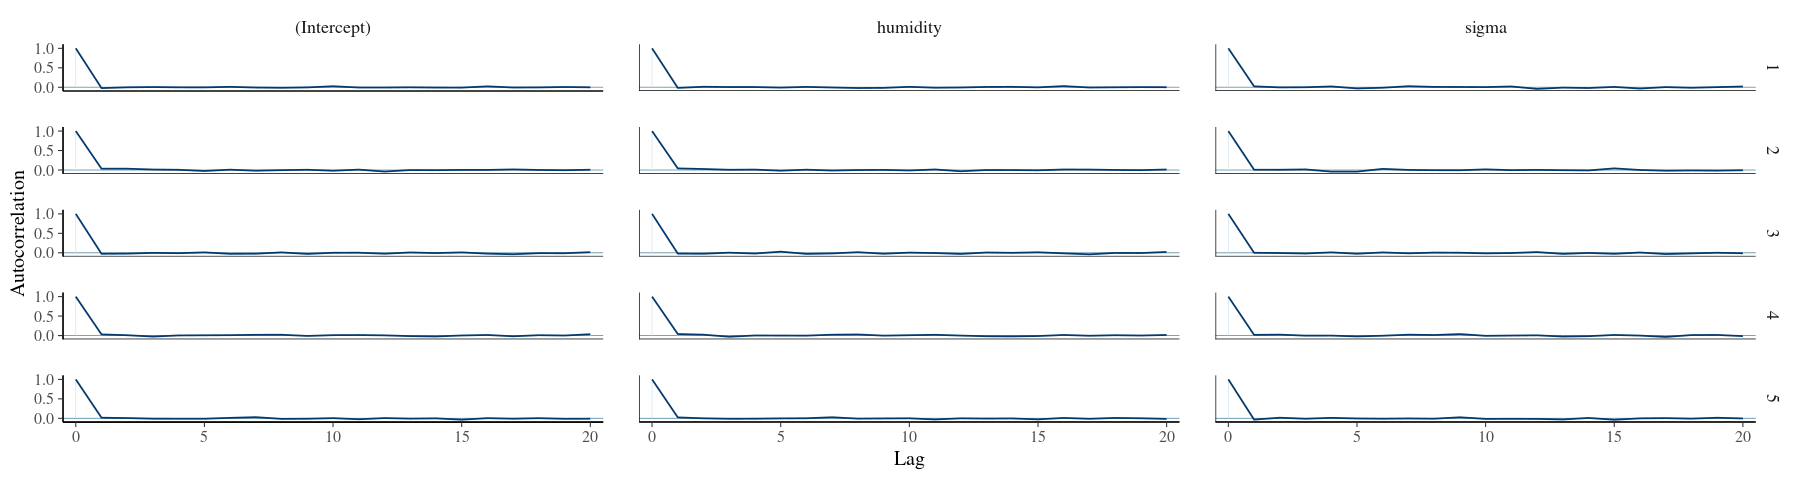

In [20]:
mcmc_acf( bike_humidity_model )

Looks good! Then probably also effective sample size ratio is large.

In [21]:
neff_ratio( bike_humidity_model )

(Intercept)    humidity       sigma 
    0.98360     0.96925     0.98230

### c)

Posterior lines:

Warning message:
“`fitted_draws` and `add_fitted_draws` are deprecated as their names were confusing.
- Use [add_]epred_draws() to get the expectation of the posterior predictive.
- Use [add_]linpred_draws() to get the distribution of the linear predictor.
- For example, you used [add_]fitted_draws(..., scale = "response"), which
  means you most likely want [add_]epred_draws(...).
NOTE: When updating to the new functions, note that the `model` parameter is now
  named `object` and the `n` parameter is now named `ndraws`.”


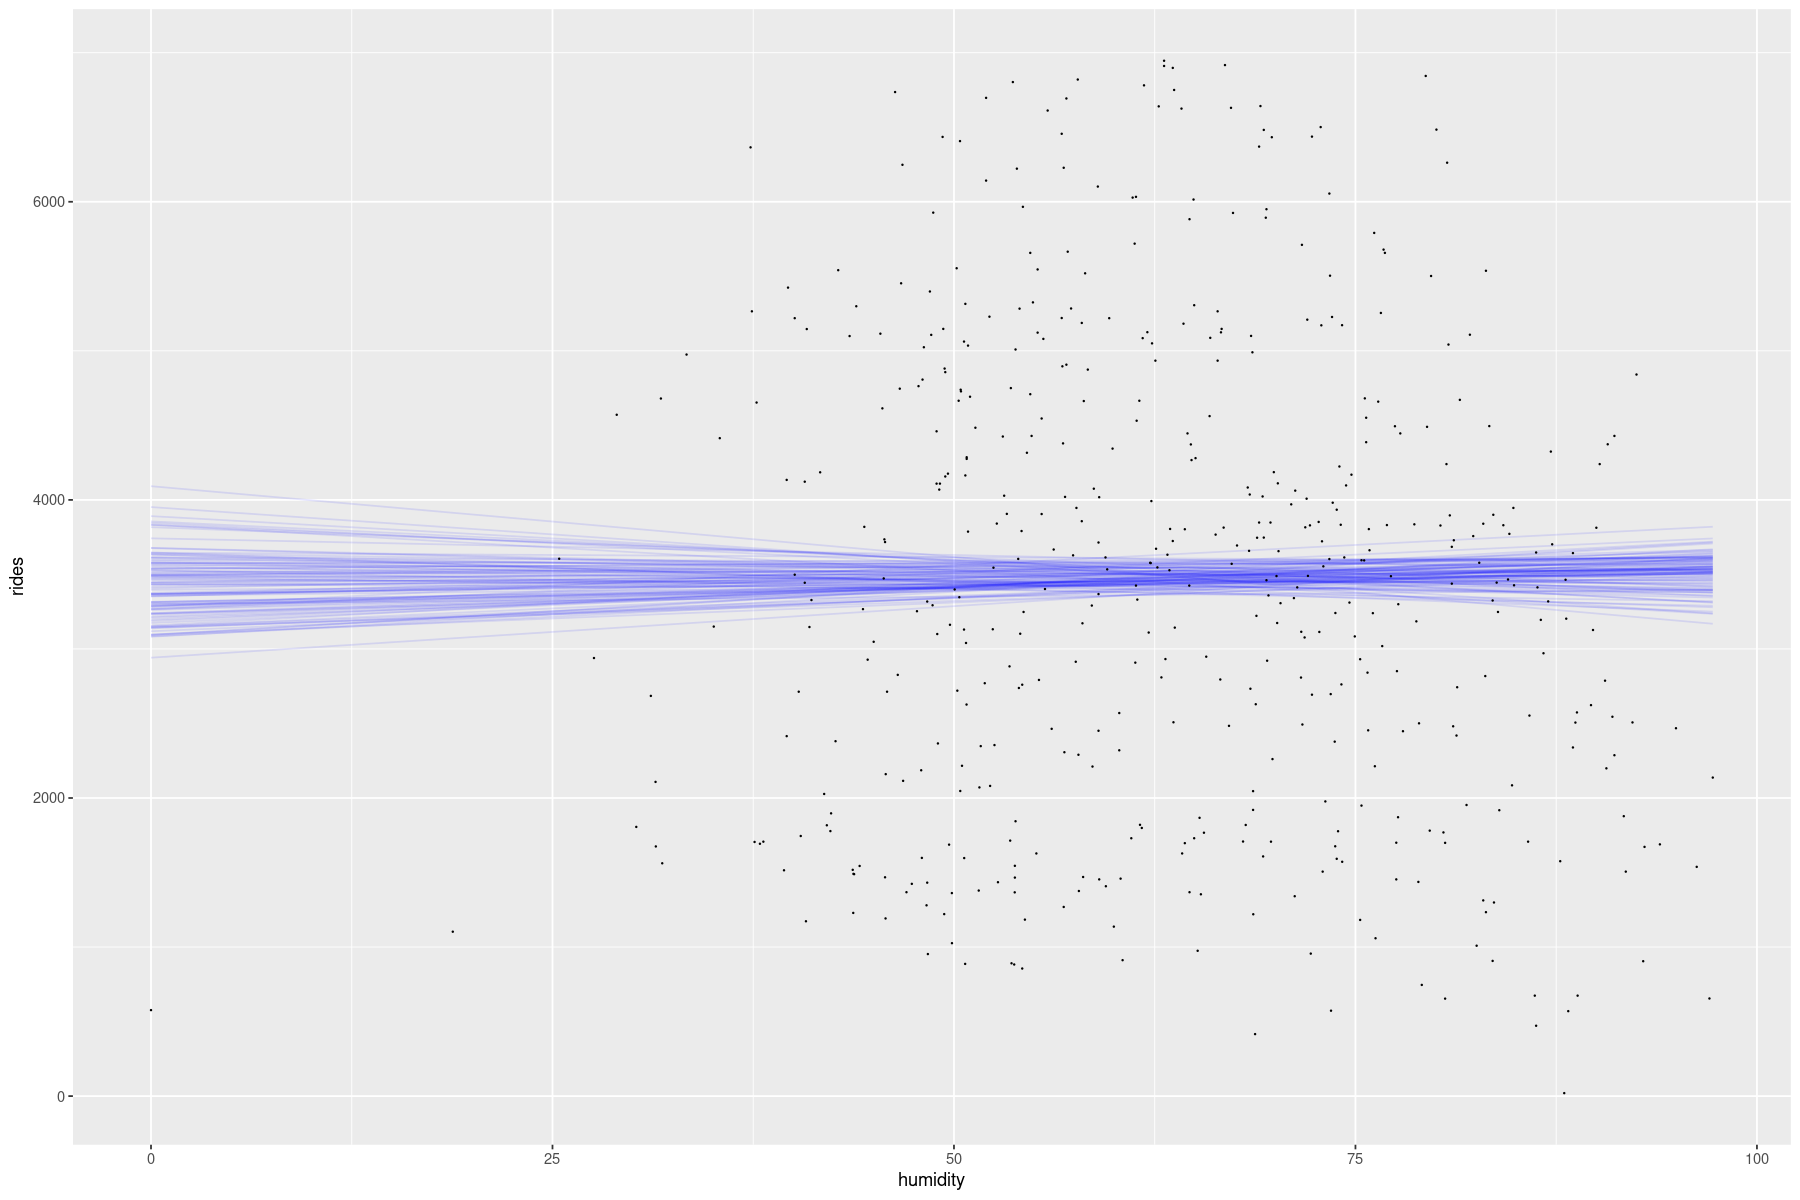

In [22]:
options(repr.plot.width=15, repr.plot.height=10)
bikes %>%
  add_fitted_draws(bike_humidity_model, n = 100) %>%
  ggplot(aes(x = humidity, y = rides)) +
    geom_line(aes(y = .value, group = .draw), alpha = 0.1, col = "blue") + 
    geom_point(data = bikes, size = 0.05)

The intercept was narrowed down quite a bit!

Posterior distributions:

In [23]:
data.frame( bike_humidity_model ) %>% 
    summarize_all( list(mean=mean, sd=sd) )

X.Intercept._mean,humidity_mean,sigma_mean,X.Intercept._sd,humidity_sd,sigma_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3433.796,0.8106482,1579.088,226.2688,3.403878,50.14182


The variances have decreased by a large factor! (2000 $\to$ 226, 10 $\to$ 3.4, 2000 $\to$ 50)

## Exercise 9.12

### a)

In [24]:
tidy(bike_humidity_model, effects = c("fixed", "aux"),
     conf.int = TRUE, conf.level = 0.95)

term,estimate,std.error,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3434.7221760,225.250742,2990.848174,3876.236774
humidity,0.8099946,3.422603,-5.816559,7.489818
sigma,1578.2656423,50.141823,1483.217699,1680.801519
mean_PPD,3484.2562015,99.792313,3289.073650,3679.794383


### b)

The noise is a bit lower than expected, however still extremely large.

### c)

Plot of prior (red) and posterior distribution (blue) of slope:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


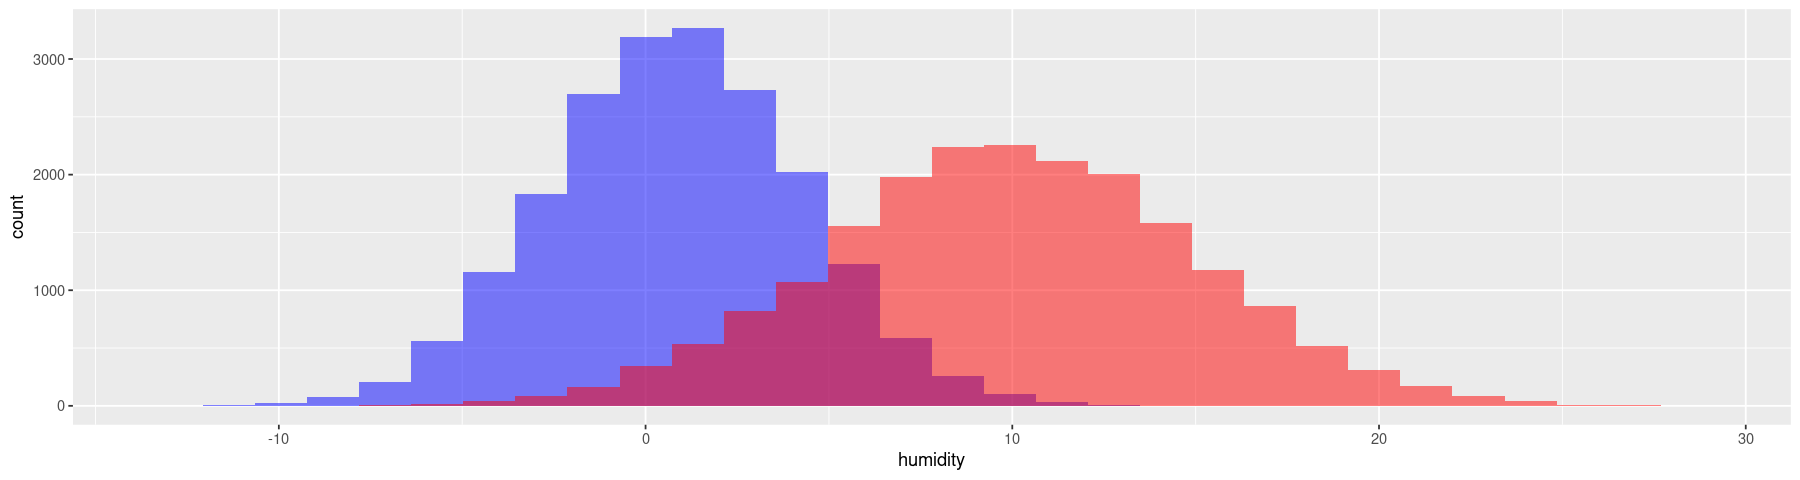

In [25]:
options(repr.plot.width=15, repr.plot.height=4)
ggplot() + 
    geom_histogram( data=data.frame(bike_humidity_model), aes(x=humidity), alpha=0.5, fill="blue", ) +
    geom_histogram( data=data.frame(bike_humidity_model_prior), aes(x=humidity), alpha=0.5, fill="red")

We strongly assumed a positive slope in the prior, however the data suggest that the slope could with equal probability be negative and is (given data + prior) most likely near zero.

### d)

No, we do not have ample evidence. The probability that the slope is positive is still larger than 50%.

## Exercise 9.13

### a)

In [26]:
bike_humidity_model_df = data.frame( bike_humidity_model )
head( bike_humidity_model_df )

,X.Intercept.,humidity,sigma
,<dbl>,<dbl>,<dbl>
1,3113.506,4.8994985,1634.080
2,3260.669,2.1678773,1595.147
3,3416.404,2.6359108,1559.959
4,3407.504,2.2857136,1570.255
5,3489.423,-1.1614780,1582.603
6,3303.120,0.8239054,1648.416


#### For humidity of 90%

In [27]:
pred90 <- bike_humidity_model_df %>% 
    mutate( mu = X.Intercept. + humidity * 90 ) %>% 
    mutate( Ynew = rnorm( nrow(bike_humidity_model_df), mean=mu, sd=sigma ) )
head( pred90 )

,X.Intercept.,humidity,sigma,mu,Ynew
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3113.506,4.8994985,1634.080,3554.460,3752.214
2,3260.669,2.1678773,1595.147,3455.778,6421.468
3,3416.404,2.6359108,1559.959,3653.636,4919.149
4,3407.504,2.2857136,1570.255,3613.218,2585.539
5,3489.423,-1.1614780,1582.603,3384.890,3620.347
6,3303.120,0.8239054,1648.416,3377.272,4158.864


In [28]:
pred90 %>% 
    summarize( mean=mean(Ynew), sd=sd(Ynew) )

mean,sd
<dbl>,<dbl>
3515.594,1589.728


There will be around 3500 bikers!

#### For tomorrow's humidity (Friday Sept 8 2023) of 47%

In [29]:
pred47 <- bike_humidity_model_df %>% 
    mutate( mu = X.Intercept. + humidity * 47 ) %>% 
    mutate( Ynew = rnorm( nrow(bike_humidity_model_df), mean=mu, sd=sigma ) )
head( pred47 )

,X.Intercept.,humidity,sigma,mu,Ynew
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3113.506,4.8994985,1634.080,3343.782,3033.256
2,3260.669,2.1678773,1595.147,3362.559,5396.018
3,3416.404,2.6359108,1559.959,3540.292,4599.289
4,3407.504,2.2857136,1570.255,3514.932,3470.614
5,3489.423,-1.1614780,1582.603,3434.834,3320.321
6,3303.120,0.8239054,1648.416,3341.844,1736.633


In [30]:
pred47 %>% 
    summarize( mean=mean(Ynew), sd=sd(Ynew) )

mean,sd
<dbl>,<dbl>
3468.608,1564.996


Also almost 3500 bikers. Our linear model is not very useful here, since the connection between number of riders and humidity is very weak. This makes sense when looking at $\beta_1$ which is centered around zero, resulting in an almost flat line.

### b)

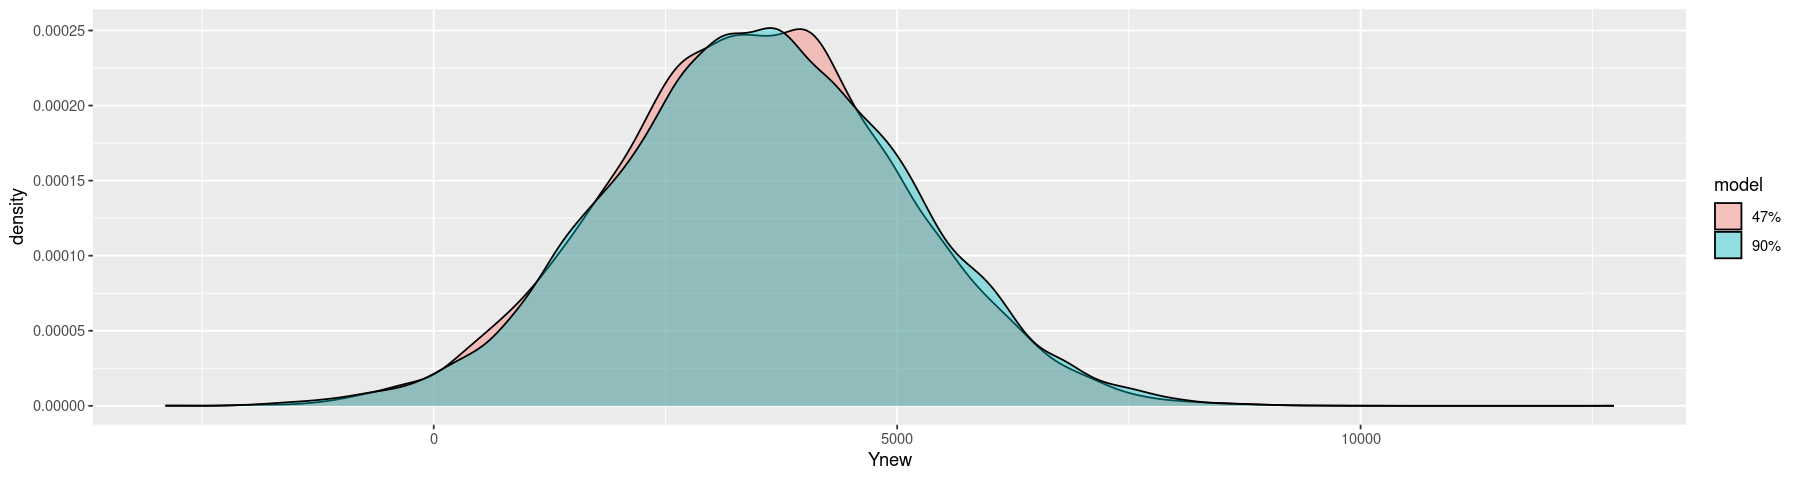

In [31]:
pred90$model <- "90%"
pred47$model <- "47%"
pred <- rbind( pred90, pred47 )
ggplot( data=pred, aes(x=Ynew, fill=model) ) + geom_density( alpha=0.4 )

No selectivity whatsoever..

### c)

In [32]:
pred47 %>% 
    summarize( ci_min=quantile(Ynew, 0.1), ci_max=quantile(Ynew, 0.9) )

ci_min,ci_max
<dbl>,<dbl>
1451.187,5474.227


The number of riders tomorrow will be anywhere between 1451 and 5491 tomorrow with a probability of 80%.

### d)

In [33]:
shortcut_prediction90 <- data.frame( 
    Ynew=posterior_predict(bike_humidity_model, newdata = data.frame(humidity = 90))[,1],
    model="90%"
)
shortcut_prediction47 <- data.frame( 
    Ynew=posterior_predict(bike_humidity_model, newdata = data.frame(humidity = 47))[,1],
    model="47%"
)
shortcut_prediction <- rbind( shortcut_prediction90, shortcut_prediction47 )

Distributions:

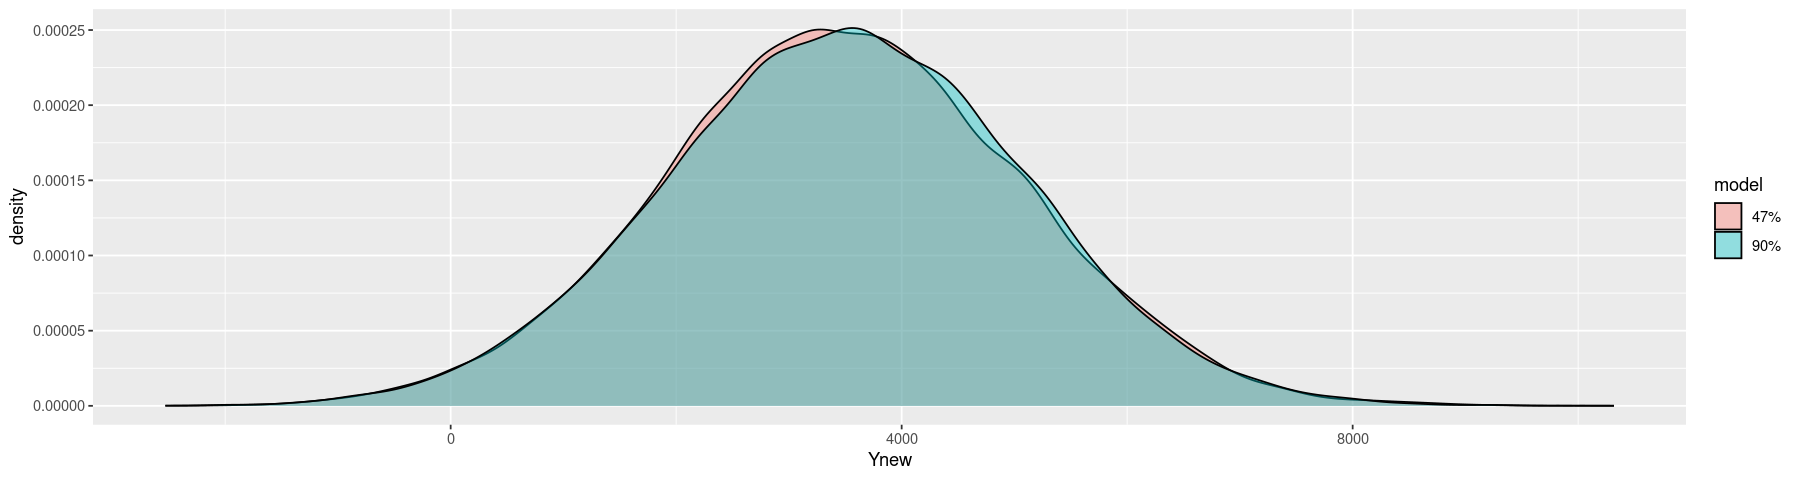

In [34]:
ggplot( data=shortcut_prediction, aes(x=Ynew, fill=model) ) + geom_density( alpha=0.4 )

A similar result!

80% credible intervals:

In [35]:
shortcut_prediction %>% 
    group_by( model ) %>% 
    summarize( ci_min=quantile(Ynew, 0.1), ci_max=quantile(Ynew, 0.9) )

model,ci_min,ci_max
<chr>,<dbl>,<dbl>
47%,1454.840,5512.733
90%,1459.989,5501.419


Also here, extremely similar to each other..

## Exercise 9.14

### a) and b)

The windspeed is given in miles per hour. I am more used to m/s, knots or the Beaufort scale. For simplicity, I use the Beaufort scale to provide rough arguments. Windspeed has probably a correlation with weather conditions and temperature, however this should be modeled separately in a multivariate model.

At average windspeeds, there will probably be an average number of bikers, so I choose the same prior model for the intercept as in the previous exercise ($N(\mu=5000, \sigma=2000)$)).
Windspeed probably has only a strong negative impact on the number of bikers when it is strong, however since we deal with a linear model, this effect has to be modeled globally - in general I expect thus a model with a negative slope. Between 0 and 4 Beaufort ($\sim0-15$ mph) it should be pretty ok to bike, however at higher windspeeds $>8$ Beaufort ($\sim 40$ mph) biking is probably no fun anymore, certainly not in storms with $>90$ mph. Assuming the average 5000 bikers at average winds of around 5 mph and no bikers at 90 mph, I get an slope coefficient of 

$$\beta_{1,c} \sim \frac{\Delta y}{\Delta x} \sim -\frac{5000 \text{ riders}}{45 \text{ mph}} \sim -111 \text{ riders/mph}$$

For extreme values, let us assume that there are 1) still 5000 riders at 90 mph or 2) only 1000 riders at 5 mph, then $\beta_1$ lies somewhere between the extremes $-55$ and $-200$. Tune a normal prior to this end:

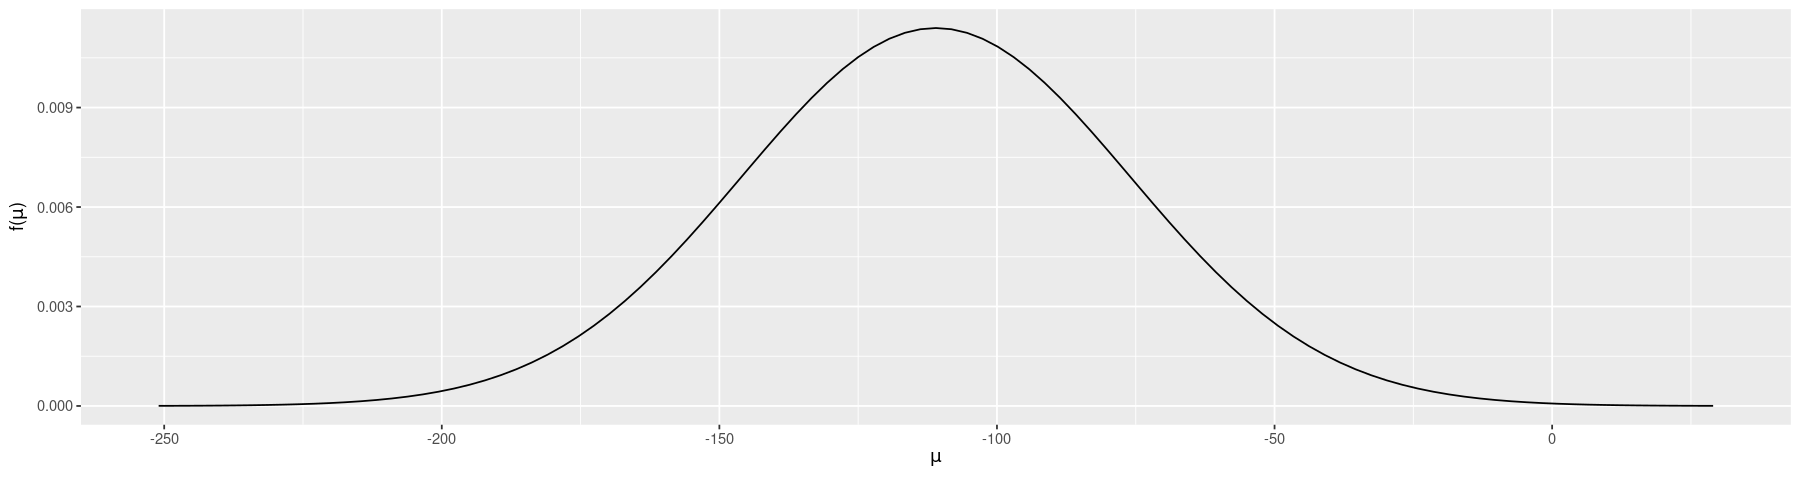

In [36]:
options(repr.plot.width=15, repr.plot.height=4)
plot_normal( mean=-111, sd=35 )

I expect the connection between windspeed and number of riders as vague as the connection between humidity and the number of riders and thus assume the same expected value for $\sigma$ as in the previous exercises.

Bayesian Normal regression model structure:

$Y_i = N(\mu_i, \sigma)$, $\mu_i = \beta_0 + \beta_1 X$

$\beta_0 \sim N(\mu=5000, \sigma=2000)$, \;
$\beta_{1,c} \sim N(\mu=-111, \sigma=35)$, \;
$\sigma \sim \text{Exp}(\lambda=1/2000)$

### c)

In [37]:
bike_windspeed_model_prior <- stan_glm(
  rides ~ windspeed, data = bikes, 
  family = gaussian,
  prior_intercept = normal(5000, 2000),
  prior = normal(-111, 35), 
  prior_aux = exponential(1/2000),
  chains = 5, iter = 4000*2, seed = 84735, prior_PD = TRUE)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 9e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 8000 [  0%]  (Warmup)
Chain 1: Iteration:  800 / 8000 [ 10%]  (Warmup)
Chain 1: Iteration: 1600 / 8000 [ 20%]  (Warmup)
Chain 1: Iteration: 2400 / 8000 [ 30%]  (Warmup)
Chain 1: Iteration: 3200 / 8000 [ 40%]  (Warmup)
Chain 1: Iteration: 4000 / 8000 [ 50%]  (Warmup)
Chain 1: Iteration: 4001 / 8000 [ 50%]  (Sampling)
Chain 1: Iteration: 4800 / 8000 [ 60%]  (Sampling)
Chain 1: Iteration: 5600 / 8000 [ 70%]  (Sampling)
Chain 1: Iteration: 6400 / 8000 [ 80%]  (Sampling)
Chain 1: Iteration: 7200 / 8000 [ 90%]  (Sampling)
Chain 1: Iteration: 8000 / 8000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.239946 seconds (Warm-up)
Chain 1:                0.039221 seconds (Sampling)
Chain 1:                

Regression lines:

Warning message:
“`fitted_draws` and `add_fitted_draws` are deprecated as their names were confusing.
- Use [add_]epred_draws() to get the expectation of the posterior predictive.
- Use [add_]linpred_draws() to get the distribution of the linear predictor.
- For example, you used [add_]fitted_draws(..., scale = "response"), which
  means you most likely want [add_]epred_draws(...).
NOTE: When updating to the new functions, note that the `model` parameter is now
  named `object` and the `n` parameter is now named `ndraws`.”


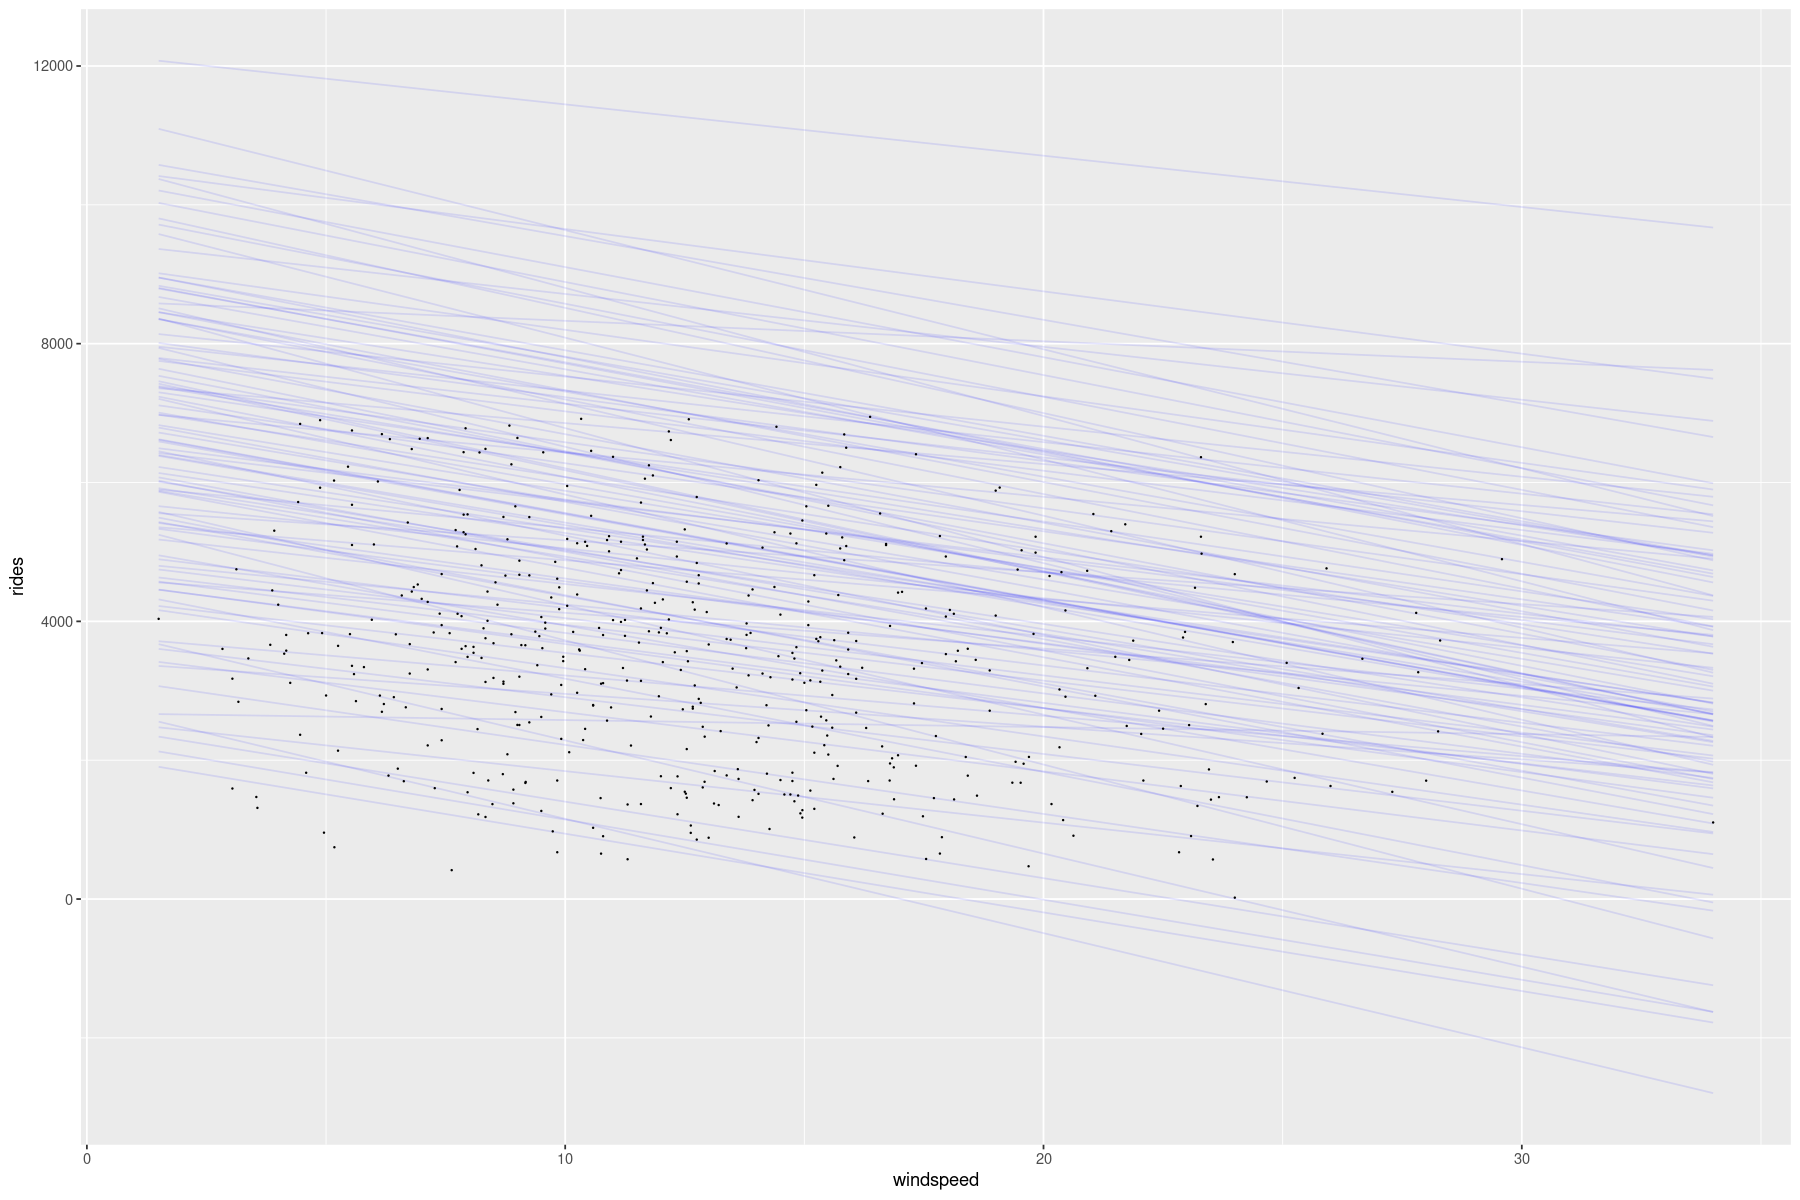

In [38]:
library(tidybayes)
options(repr.plot.width=15, repr.plot.height=10)
bikes %>%
  add_fitted_draws(bike_windspeed_model_prior, n = 100) %>%
  ggplot(aes(x = windspeed, y = rides)) +
    geom_line(aes(y = .value, group = .draw), alpha = 0.1, col = "blue") + 
    geom_point(data = bikes, size = 0.05)

Simulated data:

Warning message:
“
In add_predicted_draws(): The `n` argument is a deprecated alias for `ndraws`.
Use the `ndraws` argument instead.
See help("tidybayes-deprecated").
”


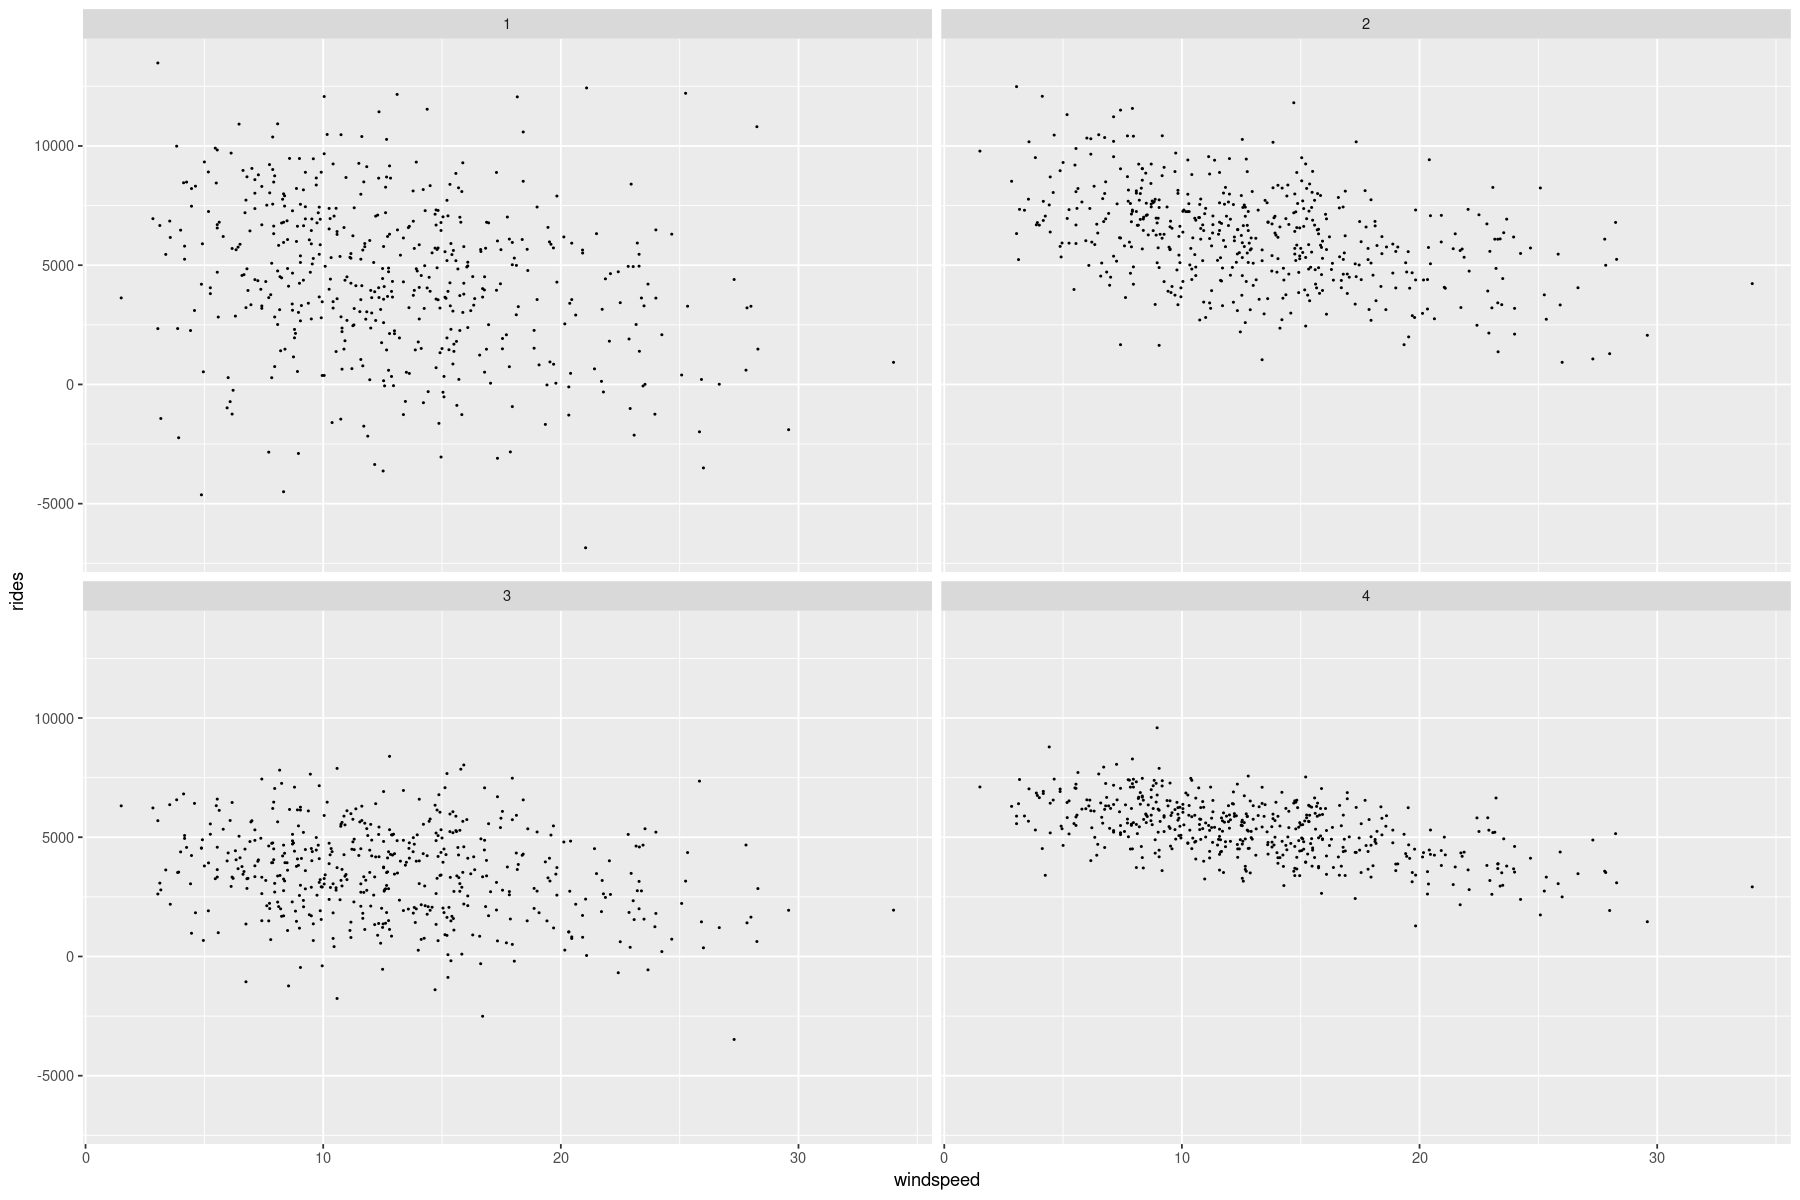

In [39]:
bikes %>%
  add_predicted_draws(bike_windspeed_model_prior, n = 4) %>%
  ggplot(aes(x = windspeed, y = rides)) +
    geom_point(aes(y = .prediction, group = .draw), size = 0.2) + 
    facet_wrap(~ .draw)

Same as before, intercept varies on a much larger scale than slope. However the intercept is now clearly negative.

### d)

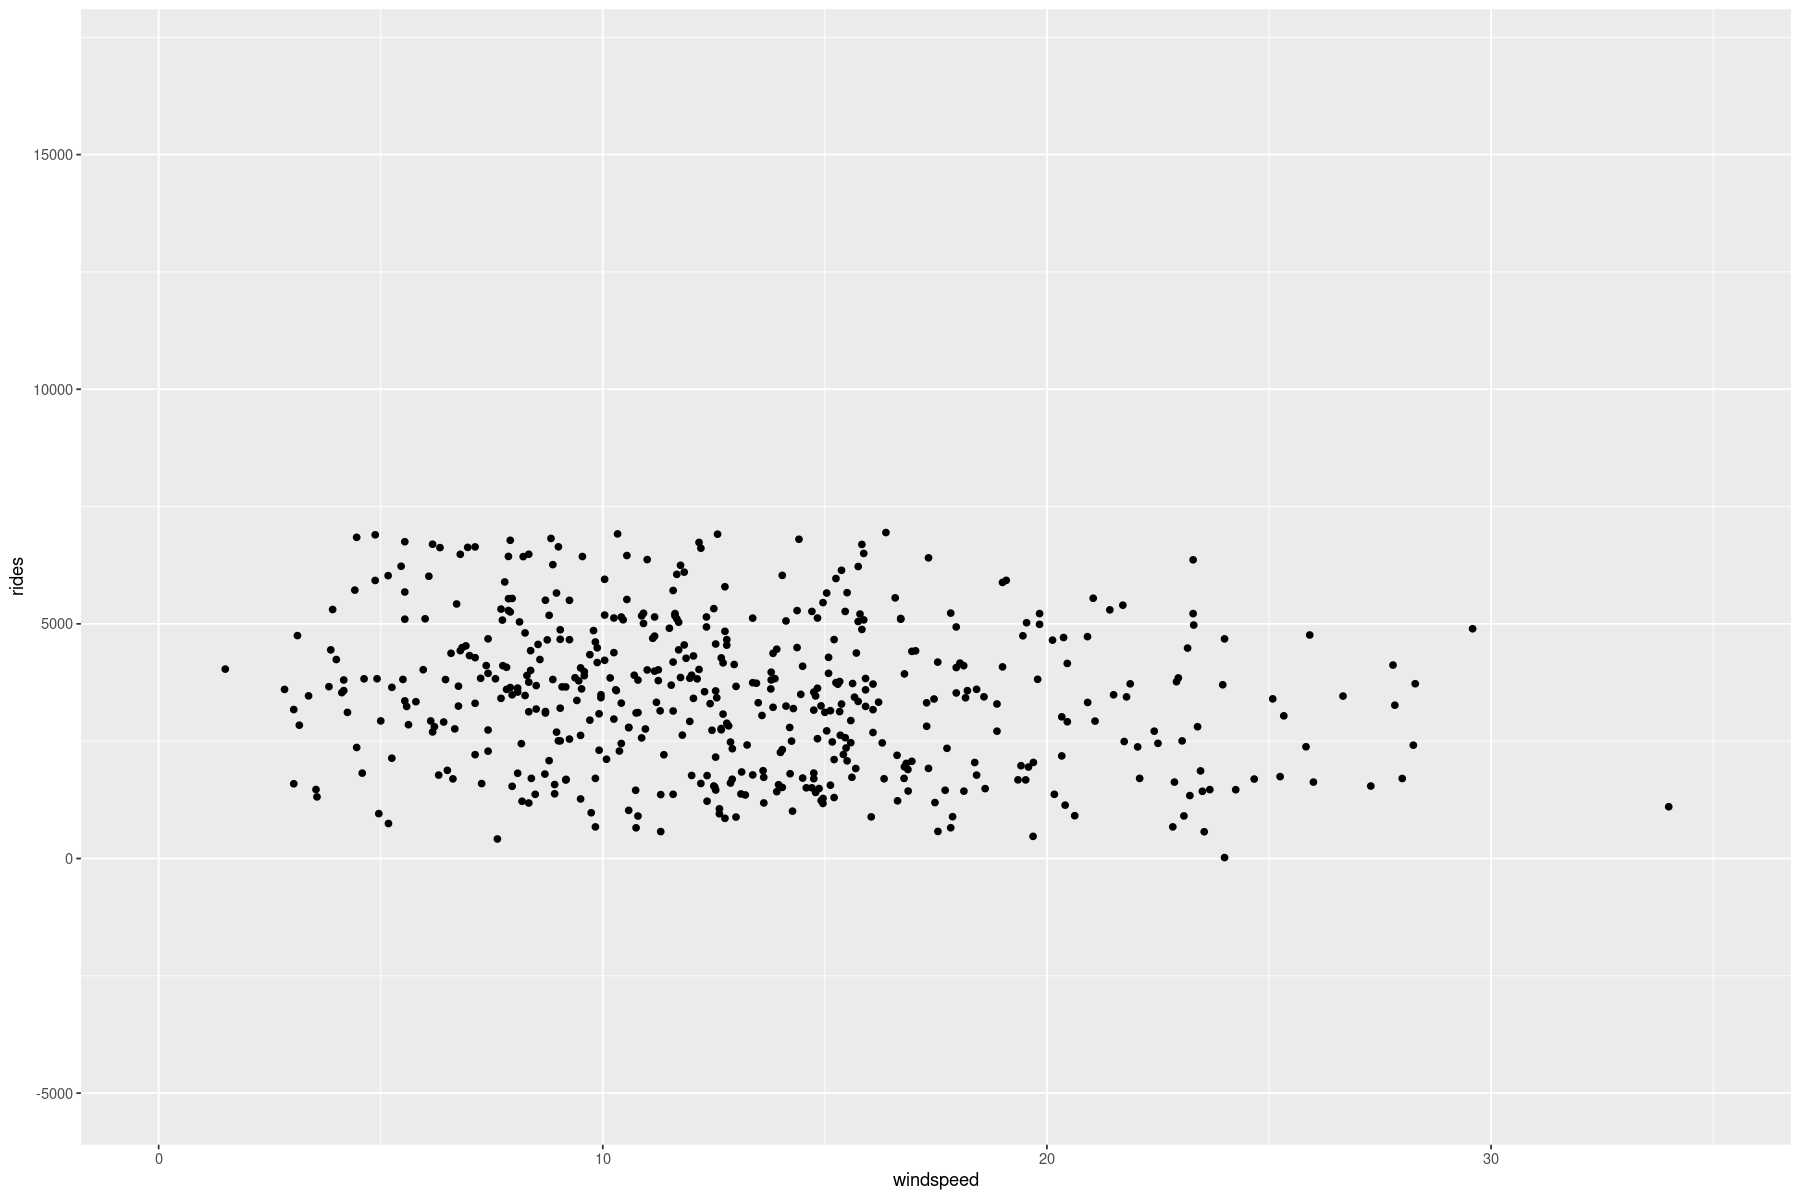

In [40]:
ggplot( data=bikes, aes(x=windspeed, y=rides) ) + geom_point() + xlim(0, 35) + ylim(-5000, 17000)

The prior assumptions are a bit too unspecific, the data vary on a much lower scale.

## Exercise 9.15

In [41]:
bike_windspeed_model_posterior <- stan_glm(
  rides ~ windspeed, data = bikes, 
  family = gaussian,
  prior_intercept = normal(5000, 2000),
  prior = normal(-111, 35), 
  prior_aux = exponential(1/2000),
  chains = 5, iter = 4000*2, seed = 84735, prior_PD = FALSE)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 8000 [  0%]  (Warmup)
Chain 1: Iteration:  800 / 8000 [ 10%]  (Warmup)
Chain 1: Iteration: 1600 / 8000 [ 20%]  (Warmup)
Chain 1: Iteration: 2400 / 8000 [ 30%]  (Warmup)
Chain 1: Iteration: 3200 / 8000 [ 40%]  (Warmup)
Chain 1: Iteration: 4000 / 8000 [ 50%]  (Warmup)
Chain 1: Iteration: 4001 / 8000 [ 50%]  (Sampling)
Chain 1: Iteration: 4800 / 8000 [ 60%]  (Sampling)
Chain 1: Iteration: 5600 / 8000 [ 70%]  (Sampling)
Chain 1: Iteration: 6400 / 8000 [ 80%]  (Sampling)
Chain 1: Iteration: 7200 / 8000 [ 90%]  (Sampling)
Chain 1: Iteration: 8000 / 8000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.141302 seconds (Warm-up)
Chain 1:                0.143342 seconds (Sampling)
Chain 1:              

Regression lines (blue) compared with frequentist regression line (red):

Warning message:
“`fitted_draws` and `add_fitted_draws` are deprecated as their names were confusing.
- Use [add_]epred_draws() to get the expectation of the posterior predictive.
- Use [add_]linpred_draws() to get the distribution of the linear predictor.
- For example, you used [add_]fitted_draws(..., scale = "response"), which
  means you most likely want [add_]epred_draws(...).
NOTE: When updating to the new functions, note that the `model` parameter is now
  named `object` and the `n` parameter is now named `ndraws`.”
`geom_smooth()` using formula = 'y ~ x'


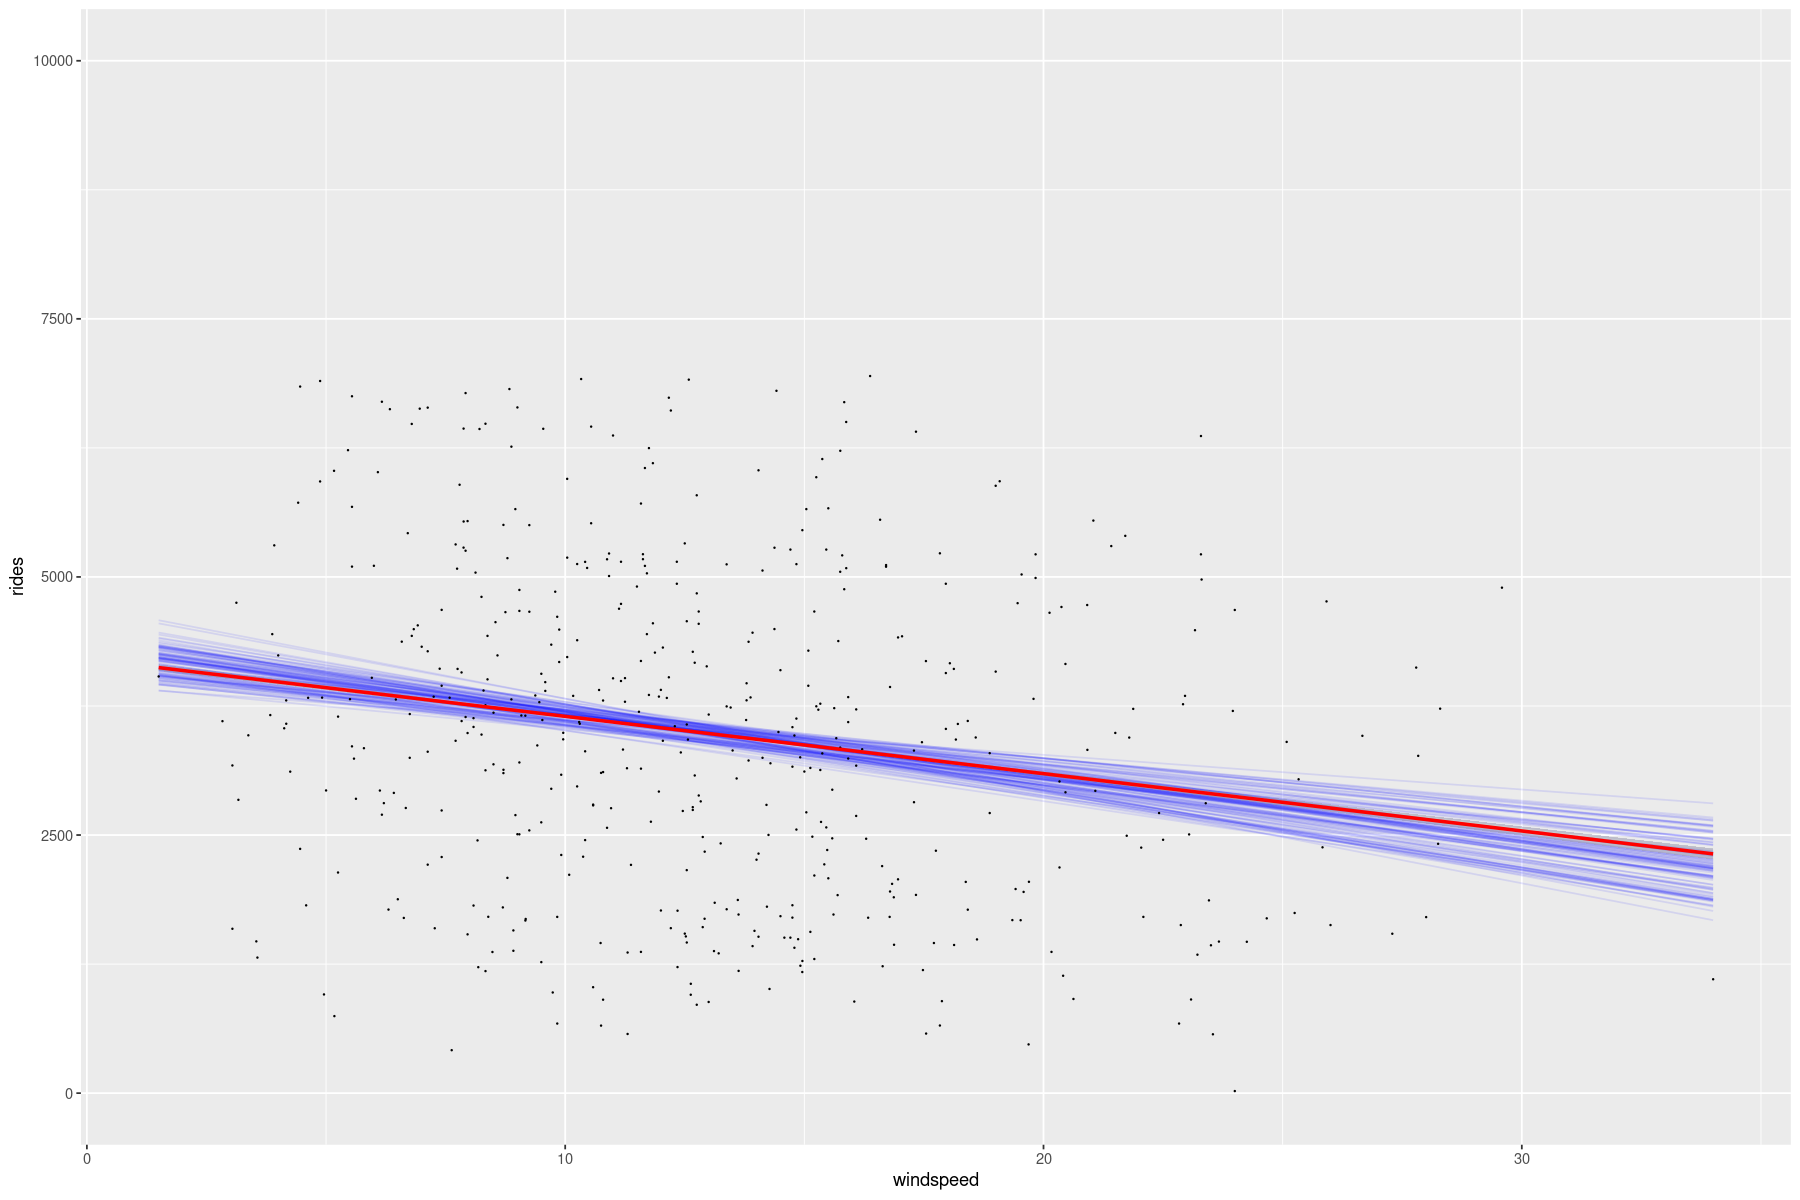

In [42]:
library(tidybayes)
options(repr.plot.width=15, repr.plot.height=10)
bikes %>%
  add_fitted_draws(bike_windspeed_model_posterior, n = 100) %>%
  ggplot(aes(x = windspeed, y = rides)) +
    geom_line(aes(y = .value, group = .draw), alpha = 0.1, col = "blue") + 
    geom_point(data = bikes, size = 0.05) +
    ylim(0, 10000) +
    geom_smooth( method="lm", col="red" )

The variance of the intercept has varied quite a bit!

Evolution of assumed distributions:

In [43]:
bike_windspeed_model_posterior_df = data.frame( bike_windspeed_model_posterior )
bike_windspeed_model_prior_df = data.frame( bike_windspeed_model_prior )
bike_windspeed_model_posterior_df$kind = "posterior"
bike_windspeed_model_prior_df$kind = "prior"
bike_windspeed_model_df = rbind( bike_windspeed_model_prior_df, bike_windspeed_model_posterior_df )
head( bike_windspeed_model_df )

,X.Intercept.,windspeed,sigma,kind
,<dbl>,<dbl>,<dbl>,<chr>
1,6842.840,-103.65511,3293.4519,prior
2,5662.131,-106.60174,1785.3671,prior
3,6587.496,-117.92008,1984.4809,prior
4,6862.335,-128.83726,1003.3518,prior
5,6068.603,-58.25917,286.4947,prior
6,5590.360,-52.30210,189.5258,prior


Intercept:

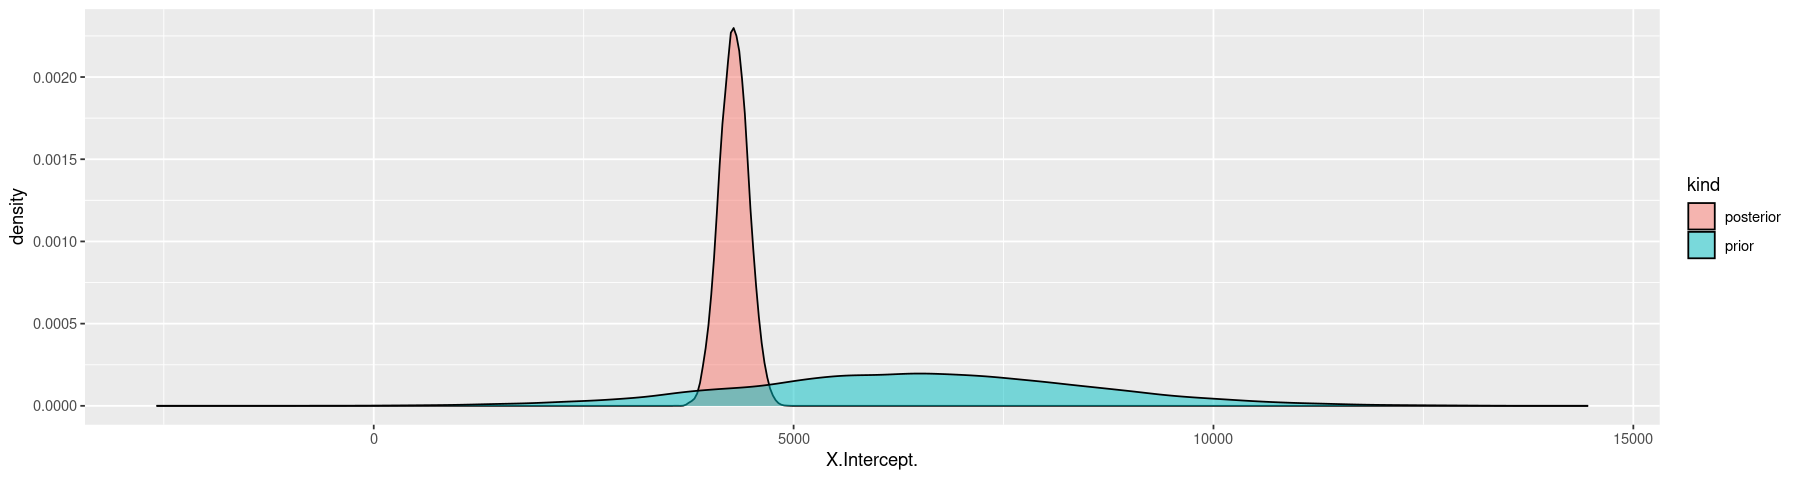

In [44]:
options(repr.plot.width=15, repr.plot.height=4)
ggplot( data=bike_windspeed_model_df ) +
    geom_density( aes(x=X.Intercept., fill=kind), alpha=0.5 )

Slope:

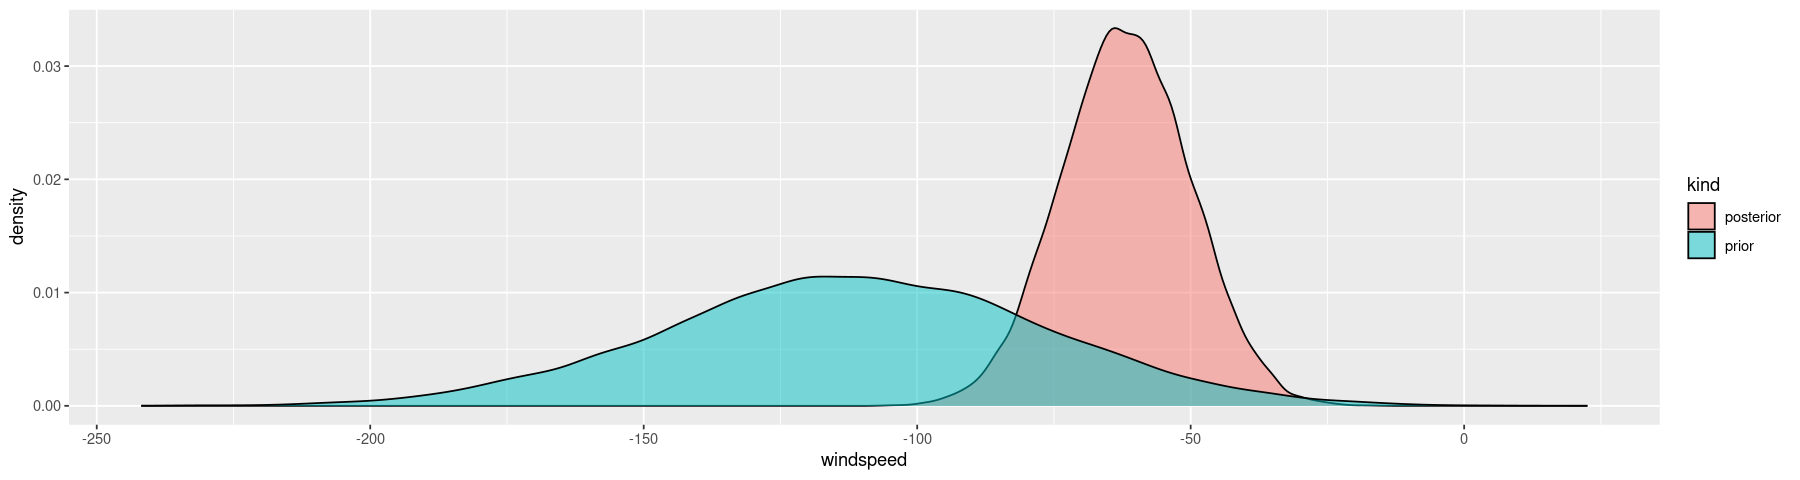

In [45]:
ggplot( data=bike_windspeed_model_df ) +
    geom_density( aes(x=windspeed, fill=kind), alpha=0.5)

Sampling noise:

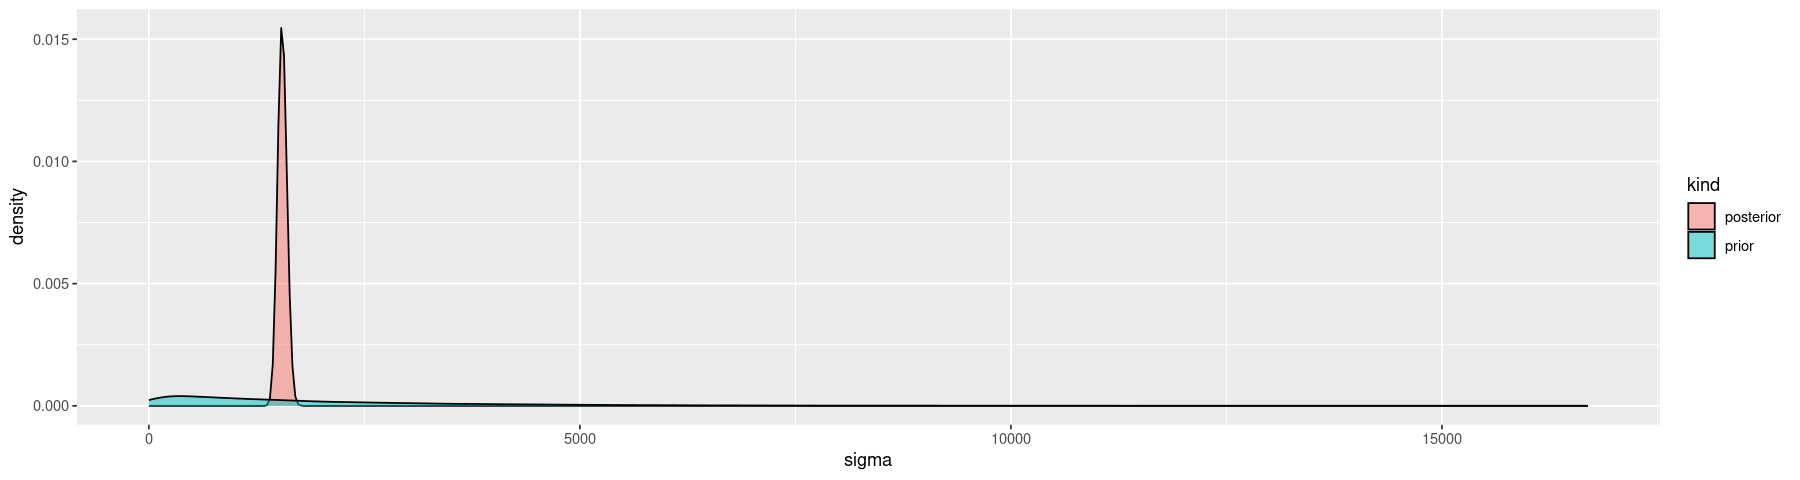

In [46]:
ggplot( data=bike_windspeed_model_df ) +
    geom_density( aes(x=sigma, fill=kind), alpha=0.5)

Our understanding has changed quite a bit. Especially the variance of intercept and sampling noise have reduced drastically. The slope since a bit lower than expected, also with less variance.

## Exercise 9.16

In [47]:
head( penguins_bayes )

species,island,year,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,above_average_weight,sex
<fct>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>
Adelie,Torgersen,2007,39.1,18.7,181,3750,0,male
Adelie,Torgersen,2007,39.5,17.4,186,3800,0,female
Adelie,Torgersen,2007,40.3,18.0,195,3250,0,female
Adelie,Torgersen,2007,NA,NA,NA,NA,NA,NA
Adelie,Torgersen,2007,36.7,19.3,193,3450,0,female
Adelie,Torgersen,2007,39.3,20.6,190,3650,0,male


### a)

Prior on bill length:

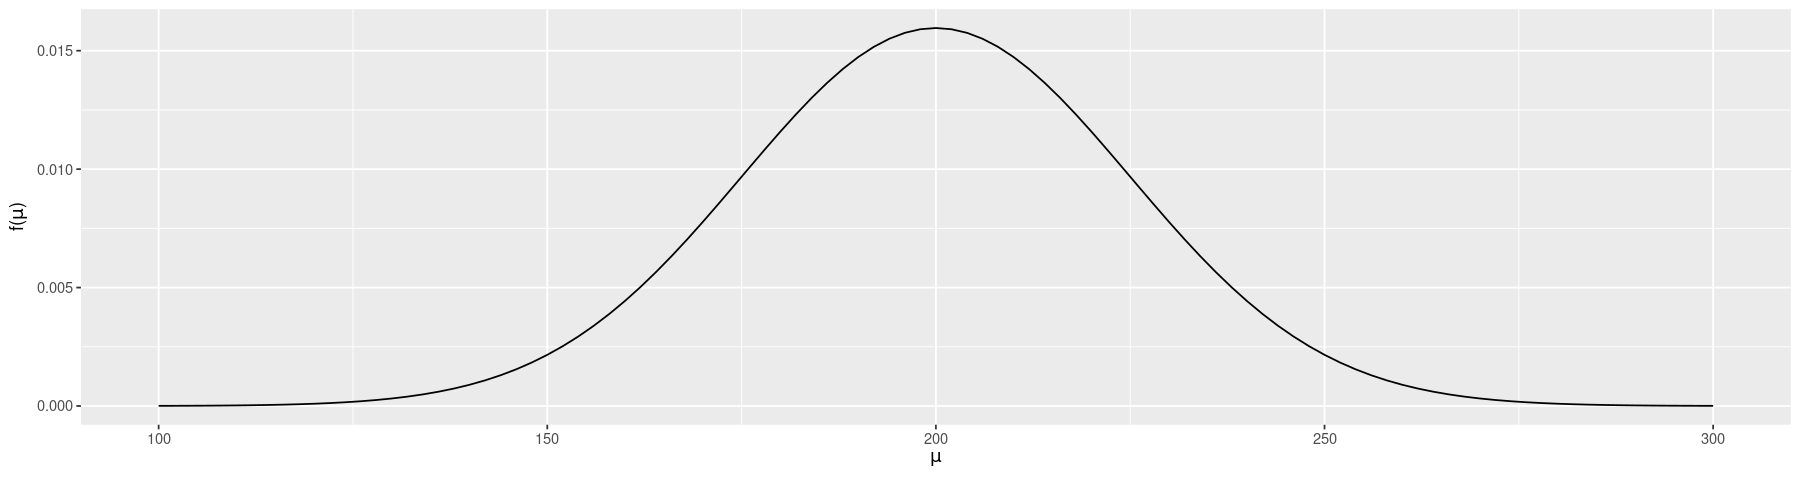

In [48]:
plot_normal( mean=200, sd=25 )

In [49]:
penguin_model_prior <- stan_glm(
  flipper_length_mm ~ bill_length_mm, data = penguins_bayes, 
  family = gaussian,
  prior_intercept = normal(200, 25),
  prior = normal(0, 1, autoscale=TRUE), 
  prior_aux = exponential(1, autoscale=TRUE),
  chains = 4, iter = 10000, seed = 84735, prior_PD = TRUE)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1: Iteration: 5001 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.043339 seconds (Warm-up)
Chain 1:                0.03938 seconds (Sampling)
Chain 1:     

### b)

In [50]:
prior_summary( penguin_model_prior )

Priors for model 'penguin_model_prior' 
------
Intercept (after predictors centered)
 ~ normal(location = 200, scale = 25)

Coefficients
  Specified prior:
    ~ normal(location = 0, scale = 1)
  Adjusted prior:
    ~ normal(location = 0, scale = 2.6)

Auxiliary (sigma)
  Specified prior:
    ~ exponential(rate = 1)
  Adjusted prior:
    ~ exponential(rate = 0.071)
------
See help('prior_summary.stanreg') for more details

Prior model:

$Y_i = N(\mu_i, \sigma)$, $\mu_i = \beta_0 + \beta_1 X$

$\beta_0 \sim N(\mu=200, \sigma=25)$, \;
$\beta_{1,c} \sim N(\mu=0, \sigma=2.6)$, \;
$\sigma \sim \text{Exp}(\lambda=0.071)$

### c)

Regression lines:

In [51]:
penguins_bayes_notna <- penguins_bayes %>% 
    filter(!is.na(bill_length_mm), !is.na(flipper_length_mm))

Warning message:
“`fitted_draws` and `add_fitted_draws` are deprecated as their names were confusing.
- Use [add_]epred_draws() to get the expectation of the posterior predictive.
- Use [add_]linpred_draws() to get the distribution of the linear predictor.
- For example, you used [add_]fitted_draws(..., scale = "response"), which
  means you most likely want [add_]epred_draws(...).
NOTE: When updating to the new functions, note that the `model` parameter is now
  named `object` and the `n` parameter is now named `ndraws`.”


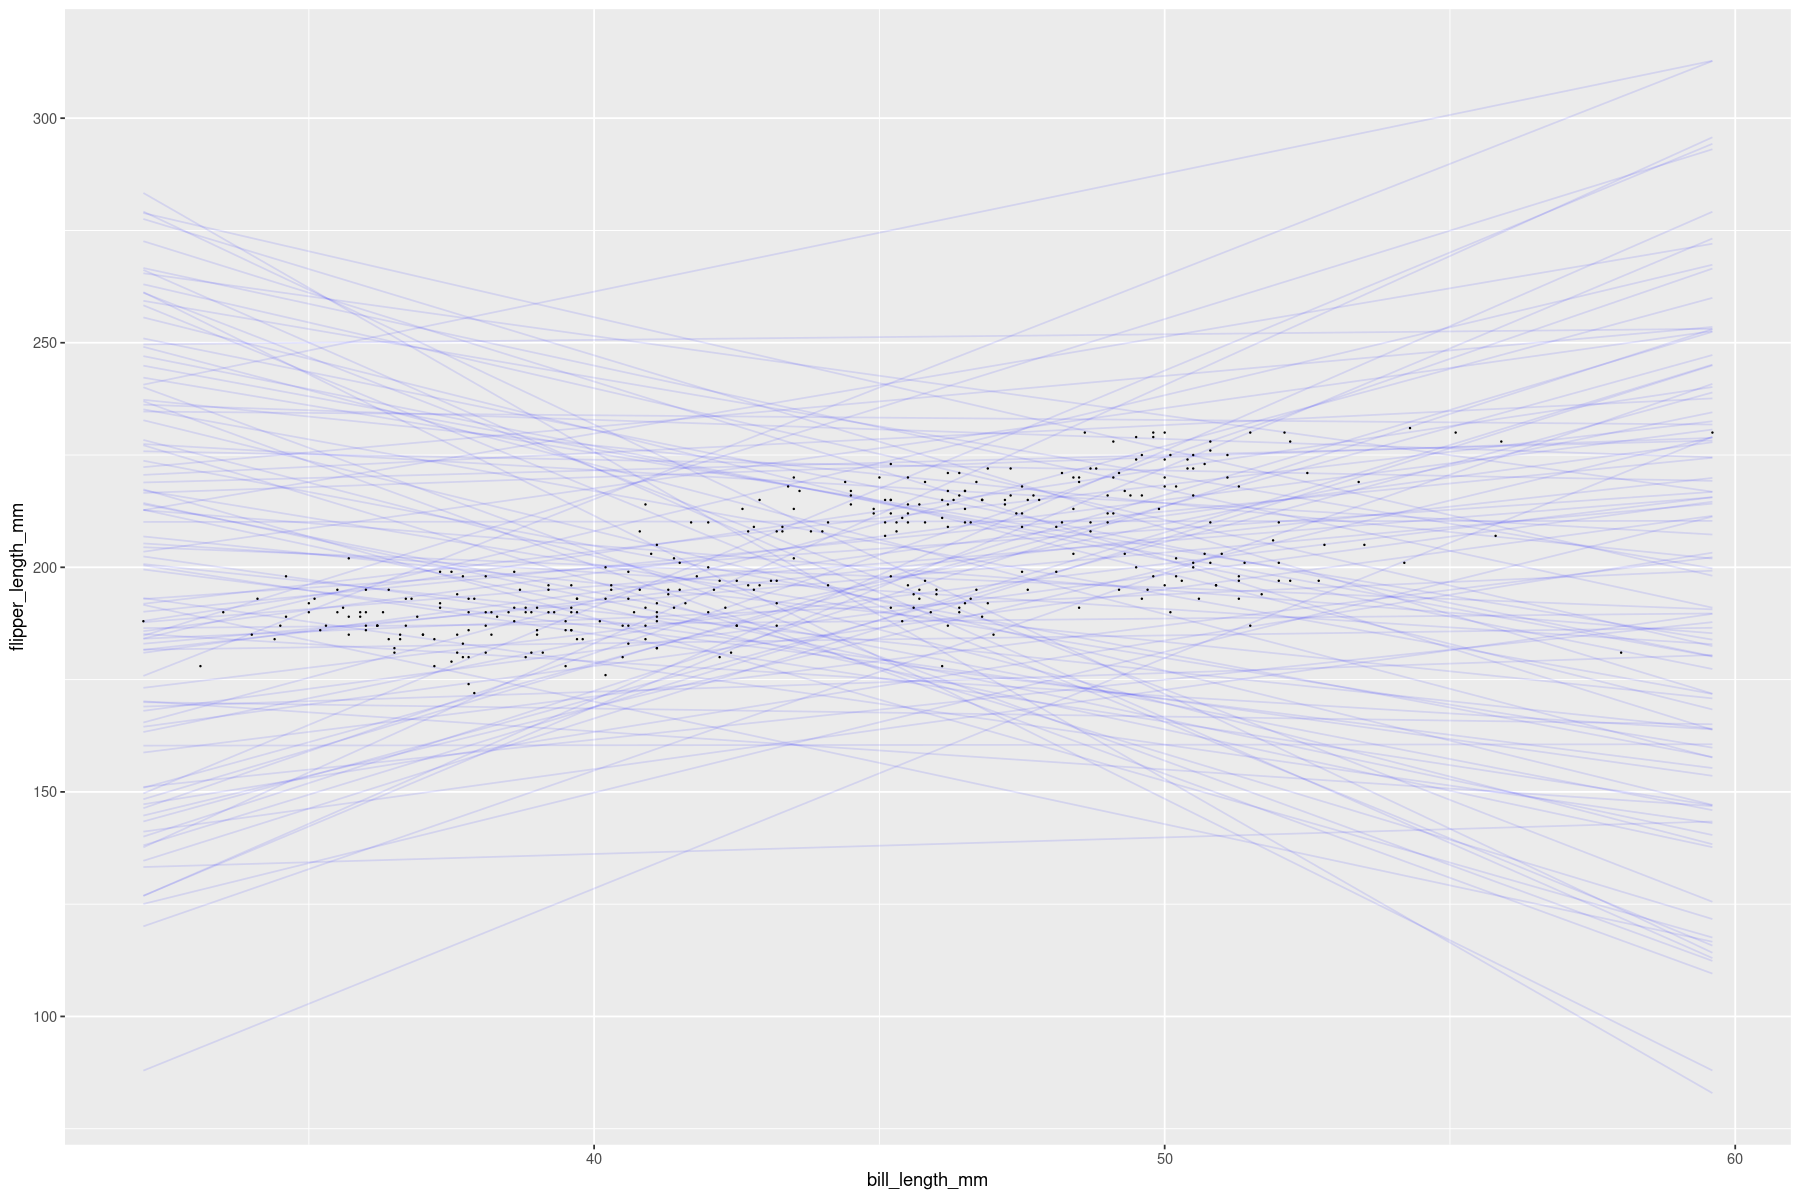

In [52]:
library(tidybayes)
options(repr.plot.width=15, repr.plot.height=10)
penguins_bayes_notna %>%
  add_fitted_draws(penguin_model_prior, n = 100) %>%
  ggplot(aes(x = bill_length_mm, y = flipper_length_mm)) +
    geom_line(aes(y = .value, group = .draw), alpha = 0.1, col = "blue") + 
    geom_point(data = penguins_bayes_notna, size = 0.05)

A lot but not anything is possible!

Datasets:

Warning message:
“
In add_predicted_draws(): The `n` argument is a deprecated alias for `ndraws`.
Use the `ndraws` argument instead.
See help("tidybayes-deprecated").
”


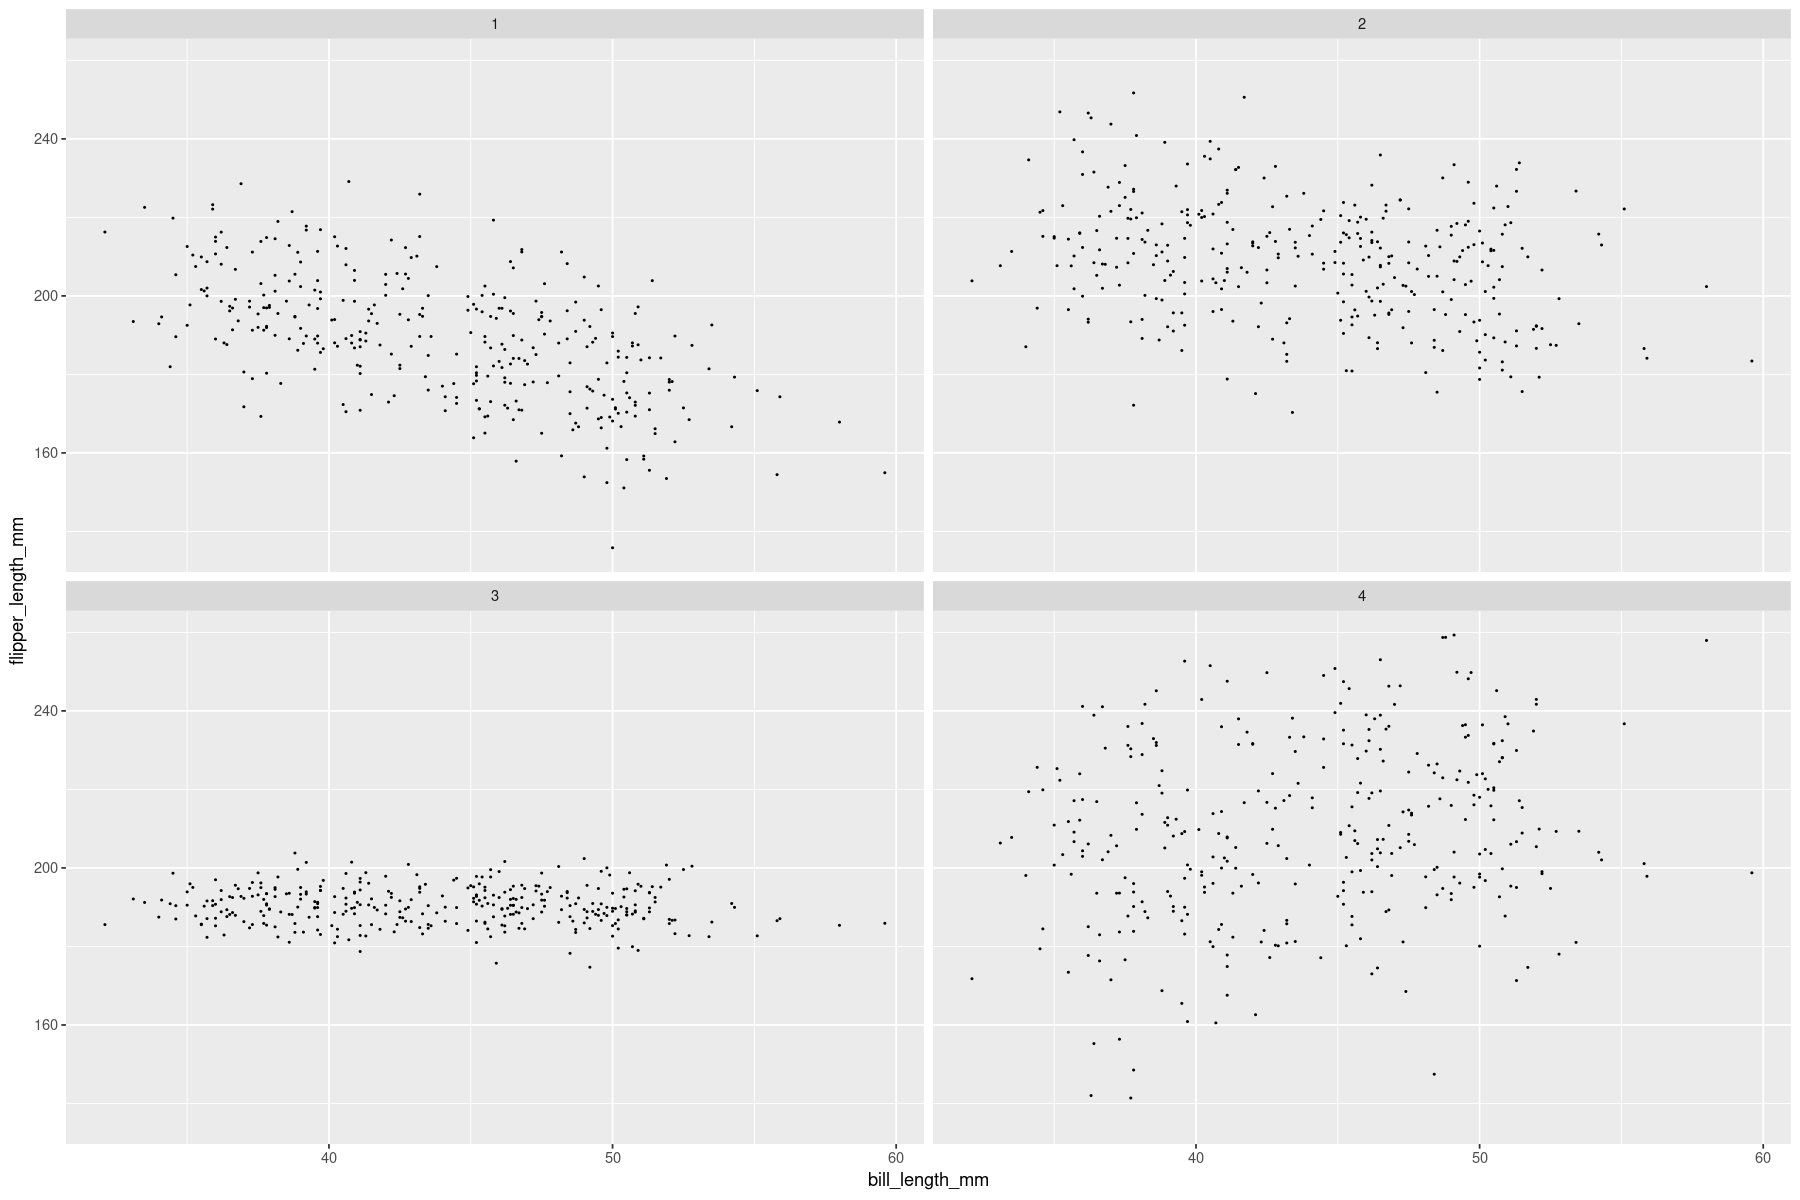

In [53]:
penguins_bayes_notna %>%
  add_predicted_draws(penguin_model_prior, n = 4) %>%
  ggplot(aes(x = bill_length_mm, y = flipper_length_mm)) +
    geom_point(aes(y = .prediction, group = .draw), size = 0.2) + 
    facet_wrap(~ .draw)

### d)

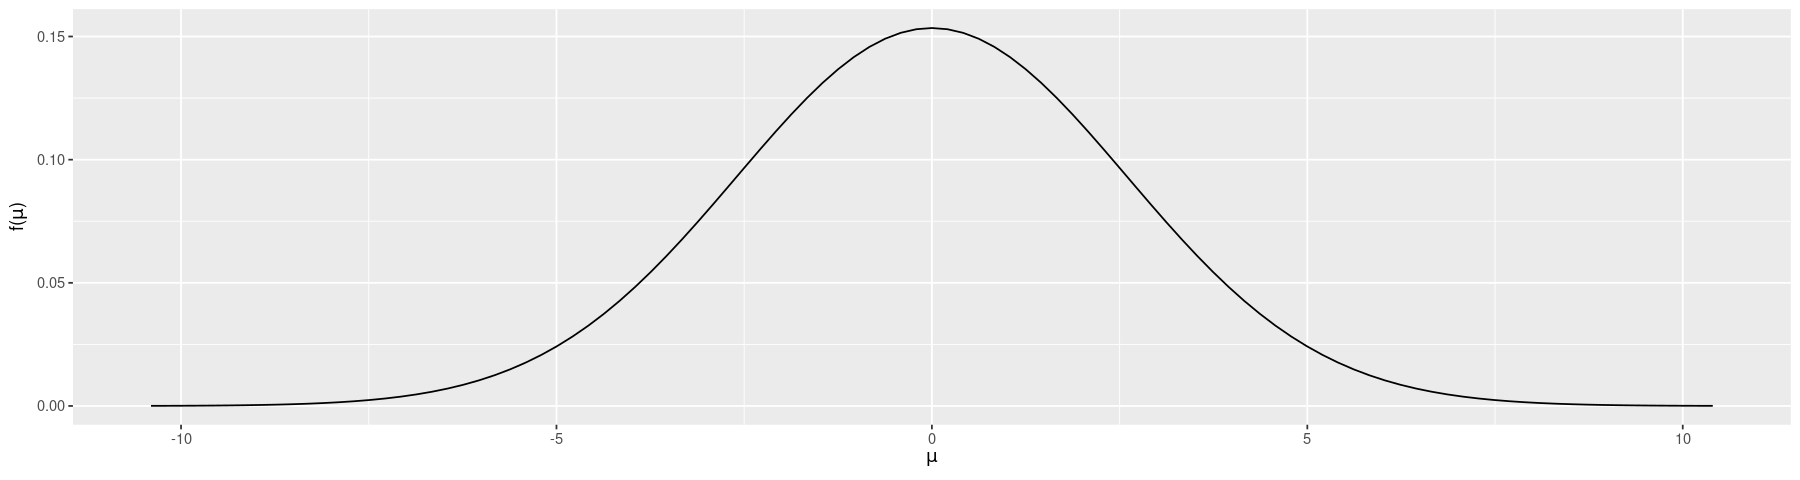

In [54]:
options(repr.plot.width=15, repr.plot.height=4)
plot_normal(mean=0, sd=2.6)

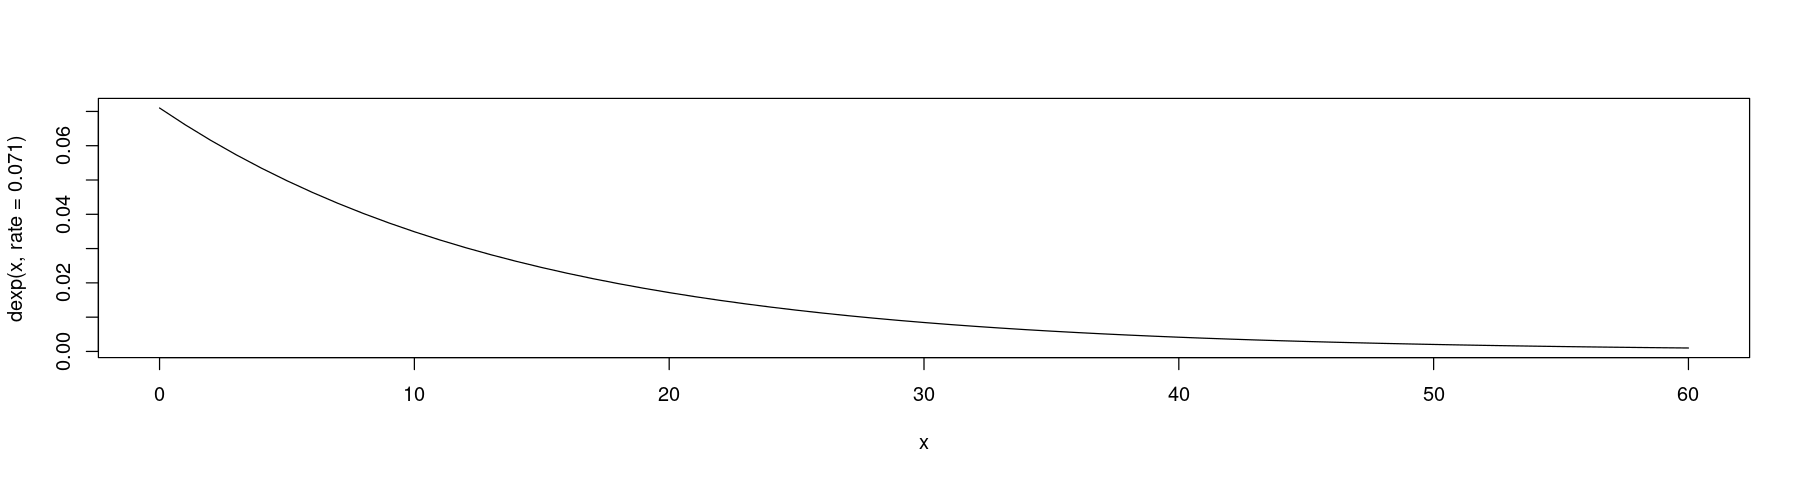

In [55]:
x <- seq(0, 60)
plot( x, dexp(x, rate=0.071), type="l" )

Intercepts between 150-250 mm are possible, slopes between -7 and 7 and the noise has a standard deviation of up to 30 mm.

## Exercise 9.17

### a)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


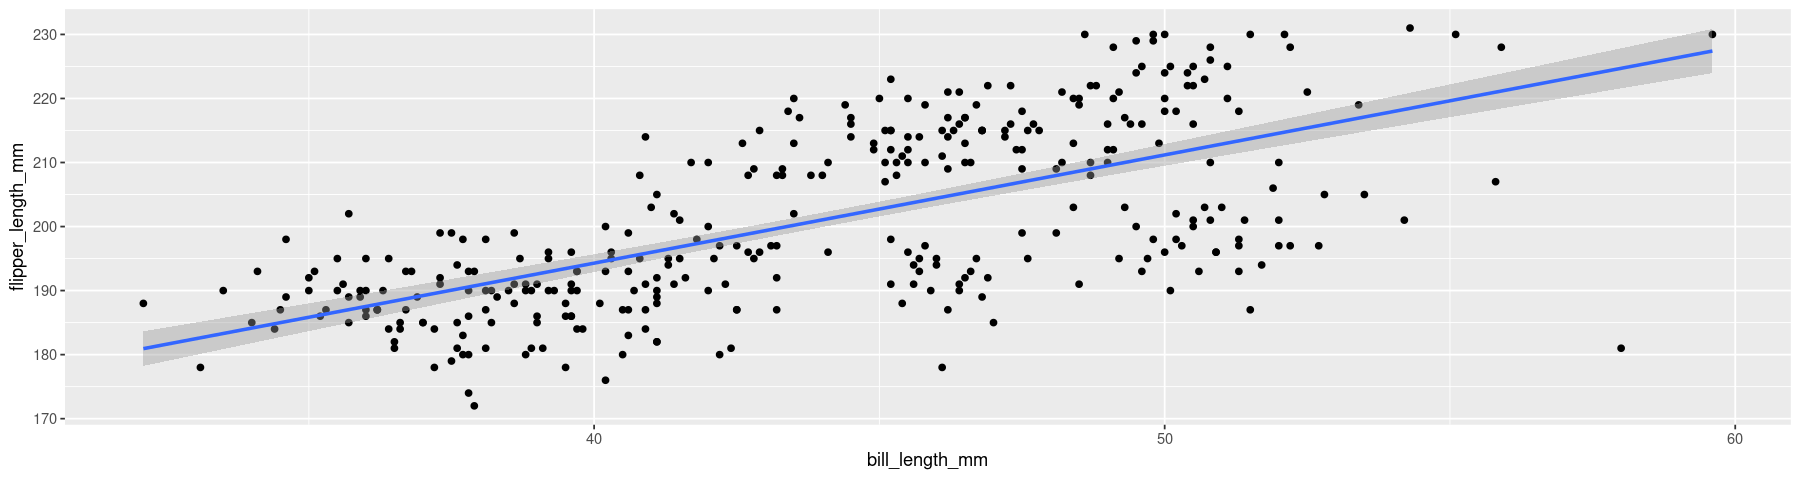

In [56]:
ggplot( data=penguins_bayes, aes(x=bill_length_mm, y=flipper_length_mm) ) + geom_point() + geom_smooth( method="lm")

There is a positive relationship between bill and flipper length with a slope around 1.5, the standard deviation of noise is $<10$ mm.

### b)

Yes, the residuals look more or less normally distributed and the variance more or less constant.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


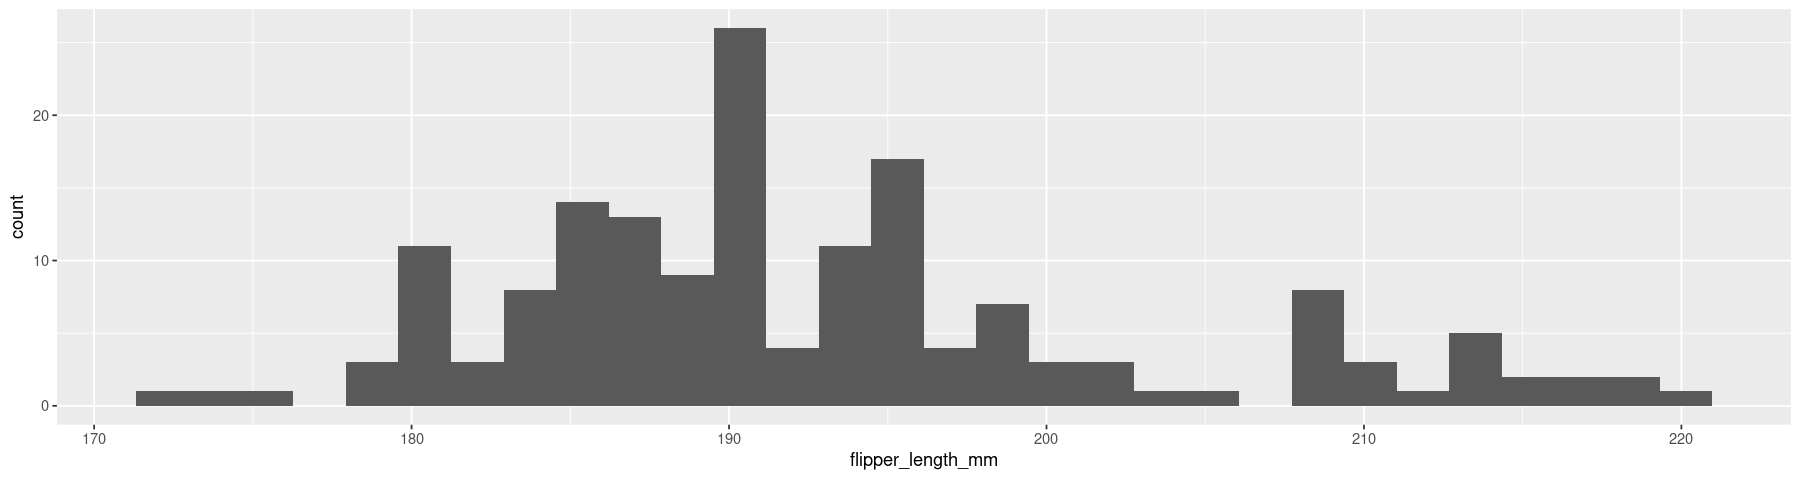

In [57]:
options(repr.plot.width=15, repr.plot.height=4)
ggplot( penguins_bayes %>% filter( bill_length_mm>35, bill_length_mm<45 ), aes(x=flipper_length_mm) ) + 
    geom_histogram()

## Exercise 9.18

### a)

In [58]:
penguin_model_posterior <- stan_glm(
  flipper_length_mm ~ bill_length_mm, data = penguins_bayes, 
  family = gaussian,
  prior_intercept = normal(200, 25),
  prior = normal(0, 1, autoscale=TRUE), 
  prior_aux = exponential(1, autoscale=TRUE),
  chains = 4, iter = 10000, seed = 84735, prior_PD = FALSE)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1: Iteration: 5001 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.059852 seconds (Warm-up)
Chain 1:                0.139061 seconds (Sampling)
Chain 1: 

### b)

Warning message:
“`fitted_draws` and `add_fitted_draws` are deprecated as their names were confusing.
- Use [add_]epred_draws() to get the expectation of the posterior predictive.
- Use [add_]linpred_draws() to get the distribution of the linear predictor.
- For example, you used [add_]fitted_draws(..., scale = "response"), which
  means you most likely want [add_]epred_draws(...).
NOTE: When updating to the new functions, note that the `model` parameter is now
  named `object` and the `n` parameter is now named `ndraws`.”


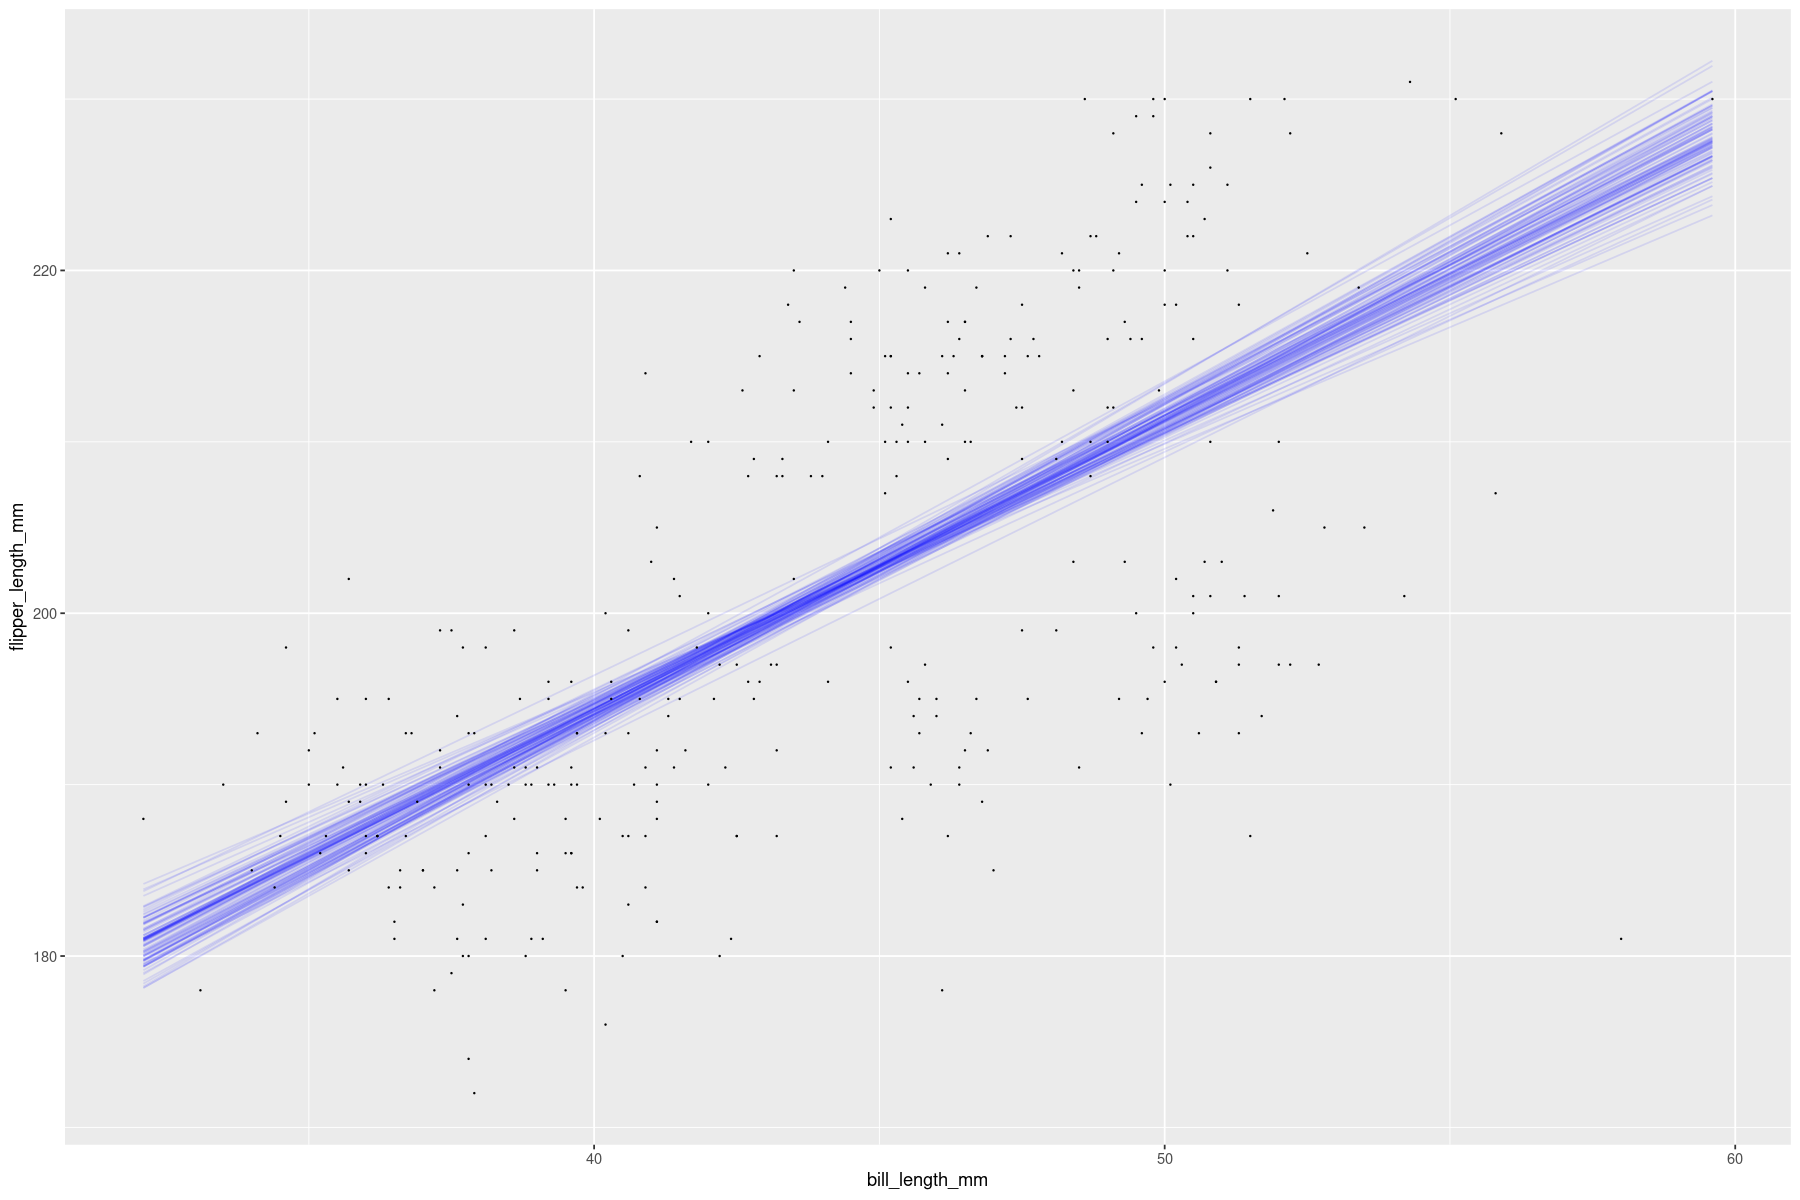

In [59]:
library(tidybayes)
options(repr.plot.width=15, repr.plot.height=10)
penguins_bayes_notna %>%
  add_fitted_draws(penguin_model_posterior, n = 100) %>%
  ggplot(aes(x = bill_length_mm, y = flipper_length_mm)) +
    geom_line(aes(y = .value, group = .draw), alpha = 0.1, col = "blue") + 
    geom_point(data = penguins_bayes_notna, size = 0.05)

The data have narrowed down the distribution for the slope quite a bit.

### c)

In [60]:
tidy(penguin_model_posterior, effects = c("fixed", "aux"),
     conf.int = TRUE, conf.level = 0.9)

term,estimate,std.error,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),126.782719,4.7034754,119.137746,134.400136
bill_length_mm,1.687882,0.1066332,1.516402,1.860831
sigma,10.637865,0.4102912,10.005861,11.342029
mean_PPD,200.923677,0.8190803,199.570673,202.259487


### d)

With 90% plausibility, the slope $\beta_1$ lies in the interval [1.52,1.86].

### e)

Yes, we have ample evidence. Penguins with longer bills tend to have longer flippers as long as $\beta_1 > 0$. In the posterior simulation, all coefficients are larger than zero, so we currently believe that there is a positive relationship with a 100% plausibility.

In [61]:
penguin_model_posterior_df = data.frame(penguin_model_posterior)
penguin_model_posterior_df %>% 
    summarize( fraction=mean(bill_length_mm>0) )

fraction
<dbl>
1


## Exercise 9.19

### a)

Simulation:

In [62]:
sim <- penguin_model_posterior_df %>%
    mutate( mu=X.Intercept. + 51*bill_length_mm ) %>% 
    mutate( Ynew=rnorm(nrow(penguin_model_posterior_df), mean=mu, sd=sigma) )
head( sim )

,X.Intercept.,bill_length_mm,sigma,mu,Ynew
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,123.8772,1.759952,11.17994,213.6348,219.7600
2,124.4226,1.729037,10.06938,212.6035,229.1960
3,129.5158,1.639111,11.28116,213.1105,224.1757
4,126.0923,1.717777,10.46458,213.6989,216.4598
5,128.1085,1.662646,10.88810,212.9035,207.0505
6,130.6763,1.621520,10.30822,213.3738,215.3477


Posterior model for typical flipper length:

In [63]:
sim %>% 
    summarize( lower=quantile(mu, 0.05), upper=quantile(mu,0.95) )

lower,upper
<dbl>,<dbl>
211.3178,214.4123


The average flipper length for all penguins with bill length of 51 mm lies with a probability of 90% between 211.3 and 214.4.

Posterior predictive model:

In [64]:
sim %>% 
    summarize( lower=quantile(Ynew, 0.05), upper=quantile(Ynew,0.95) )

lower,upper
<dbl>,<dbl>
195.5244,230.2396


Pablo's flipper length lies between 195.3 and 230.4 mm with a probability of 90%. The contribution of sampling variability is quite large here.

### b)

Average flipper posterior length in red, posterior predictive model in blue.

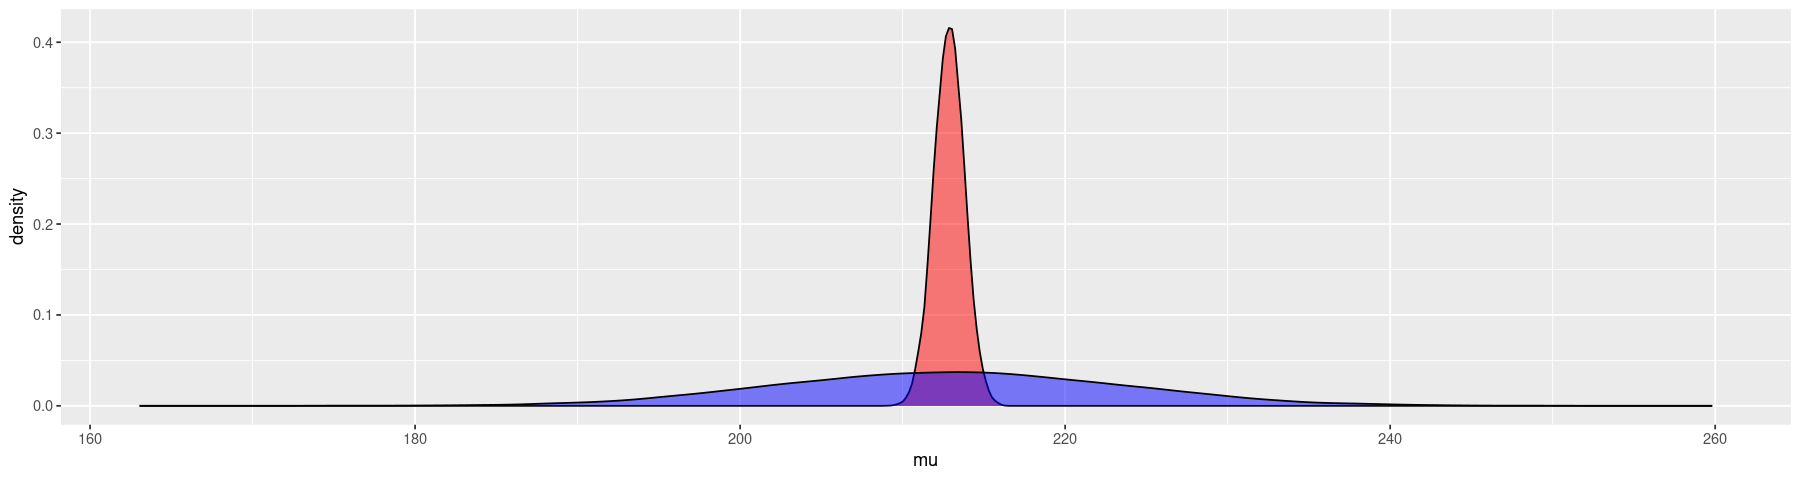

In [65]:
options(repr.plot.width=15, repr.plot.height=4)
ggplot( sim ) +
    geom_density( aes(x=mu), fill="red", alpha=0.5 ) +
    geom_density( aes(x=Ynew), fill="blue", alpha=0.5 )

### c)

In [66]:
sim %>% 
    summarize( lower=quantile(Ynew, 0.1), upper=quantile(Ynew,0.9) )

lower,upper
<dbl>,<dbl>
199.2137,226.537


### d)

More narrow, since sampling variability has not to be accounted for. Here's the proof:

In [67]:
sim %>% 
    summarize( lower=quantile(mu, 0.1), upper=quantile(mu,0.9) )

lower,upper
<dbl>,<dbl>
211.6633,214.0649


### e)

In [68]:
shortcut_prediction <- data.frame( 
    Ynew=posterior_predict(penguin_model_posterior, newdata = data.frame(bill_length_mm = 51))[,1]
)

In [69]:
shortcut_prediction %>% 
    summarize( lower=quantile(Ynew, 0.1), upper=quantile(Ynew,0.9) )

lower,upper
<dbl>,<dbl>
199.1529,226.6365


Practically similar!

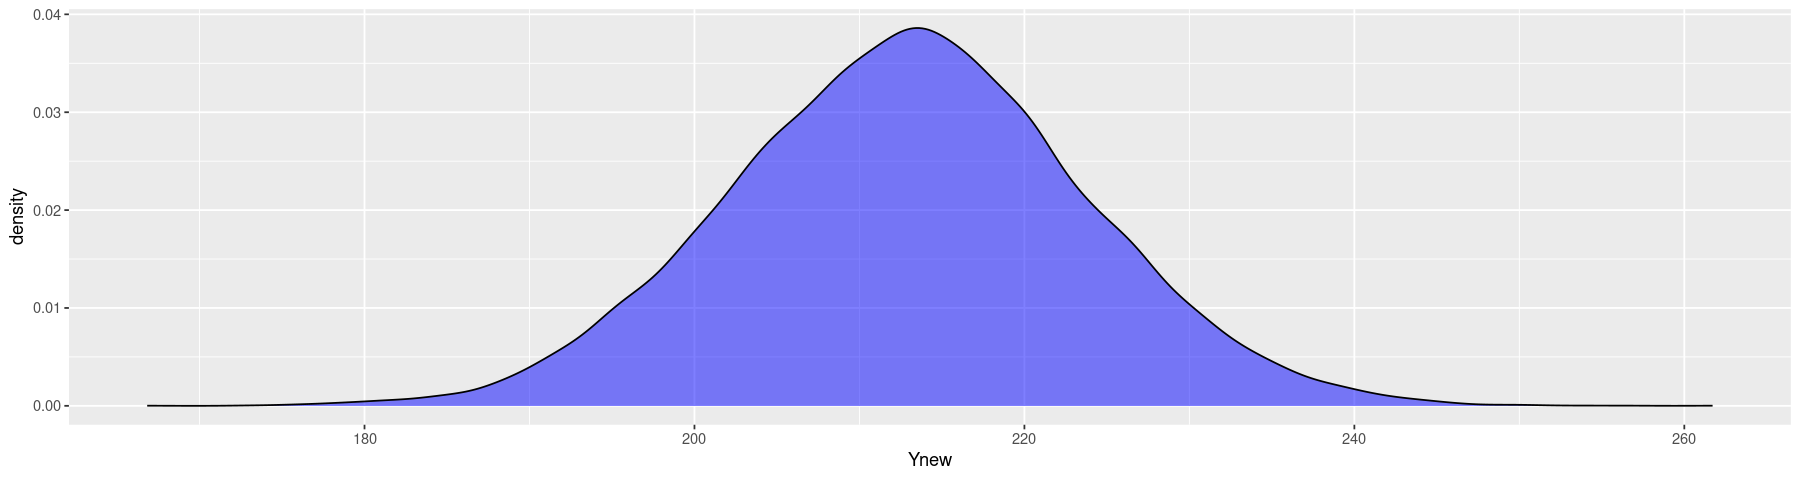

In [70]:
options(repr.plot.width=15, repr.plot.height=4)
ggplot( shortcut_prediction ) +
    geom_density( aes(x=Ynew), fill="blue", alpha=0.5 )

## Exercise 9.20

### a)

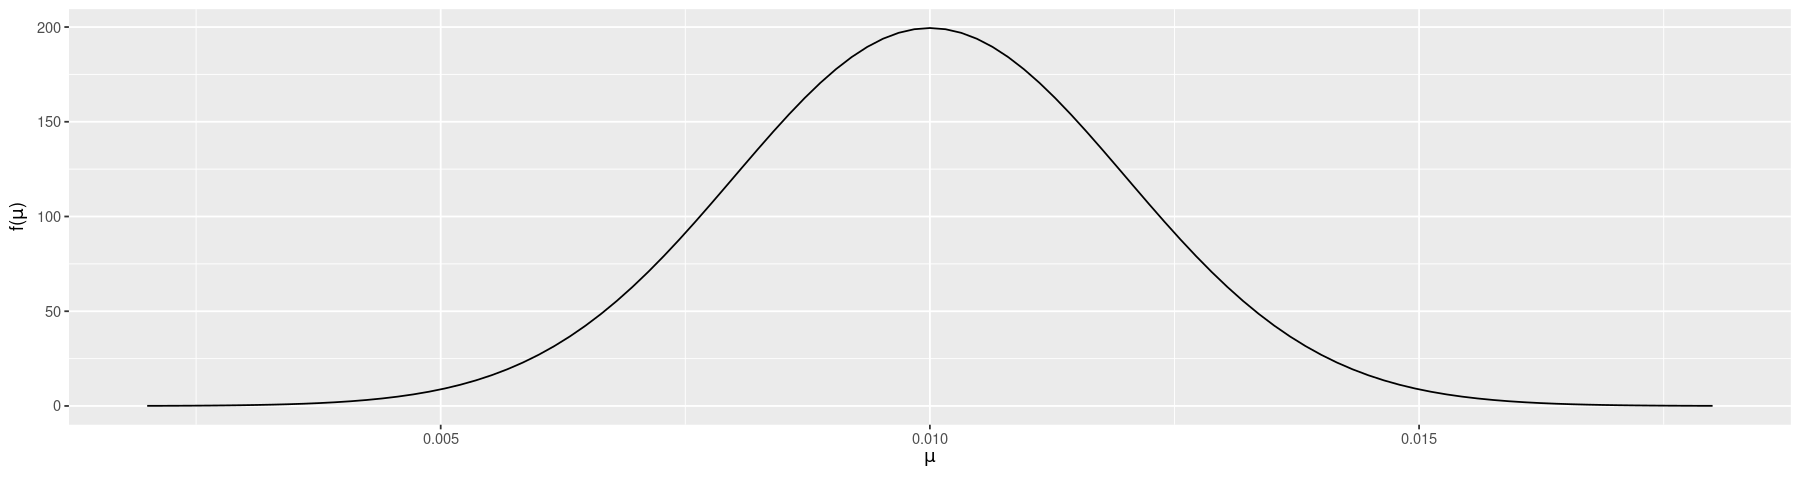

In [71]:
plot_normal( mean=0.01, sd=0.002 )

In [72]:
qnorm( p=c(0.05, 0.95) , mean=0.01, sd=0.002 )

[1] 0.006710293 0.013289707

Researchers are quite certain, that the slope of the relationship is somewhere between 0.005 and 0.015. In other words, they believe to 90% that the slope is somewhere between 0.0067 and 0.013.

### b)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


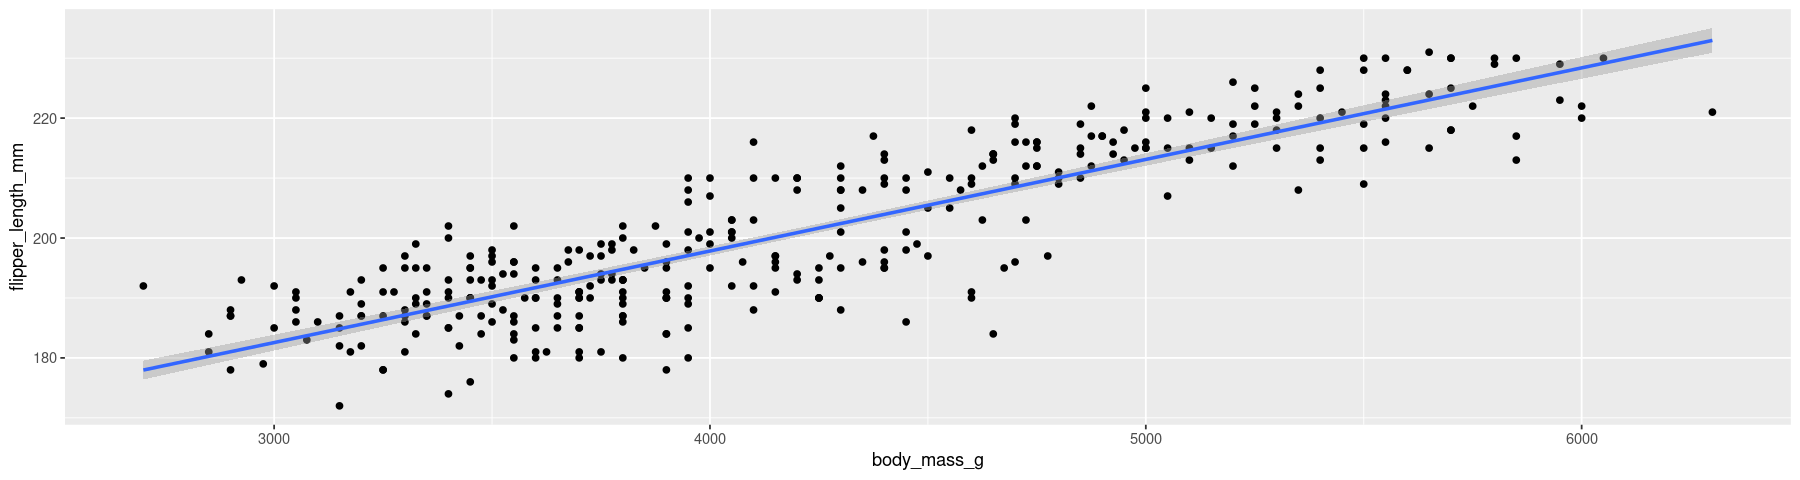

In [73]:
ggplot( data=penguins_bayes, aes(x=body_mass_g, y=flipper_length_mm) ) + geom_point() + geom_smooth( method="lm")

Observed relationship: Slope of around 0.016, larger than expected.

### c)

In the posterior model using bill_length, we found $\sigma \sim 10$. It appears that $\sigma$ here is slightly lower, but not much more than a factor of two.

Estimate of around 7:

In [74]:
penguins_bayes %>% 
    filter( body_mass_g>3700, body_mass_g<4000 ) %>% 
    summarise( mean=mean(flipper_length_mm), sd=sd(flipper_length_mm) )

mean,sd
<dbl>,<dbl>
193.1042,7.131708


### d)

In [75]:
penguin_model2_posterior <- stan_glm(
  flipper_length_mm ~ body_mass_g, data = penguins_bayes, 
  family = gaussian,
  prior_intercept = normal(200, 25, autoscale=TRUE),
  prior = normal(0.01, 0.002), 
  prior_aux = exponential(1, autoscale=TRUE),
  chains = 4, iter = 10000, seed = 84735, prior_PD = FALSE)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1: Iteration: 5001 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.058577 seconds (Warm-up)
Chain 1:                0.143265 seconds (Sampling)
Chain 1: 

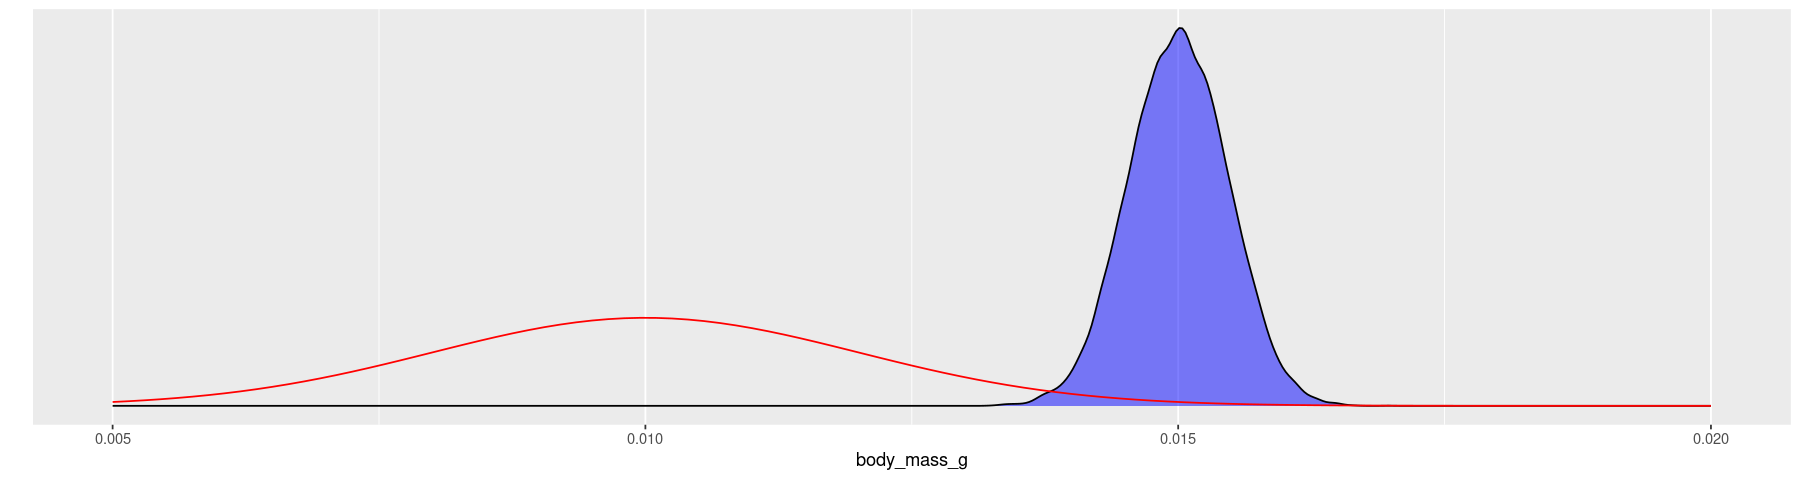

In [76]:
penguin_model2_posterior_df = data.frame( penguin_model2_posterior )
ggplot( data=penguin_model2_posterior_df, aes( x=body_mass_g ) ) + 
    geom_density( fill="blue", alpha=0.5 ) +    
    stat_function(fun = dnorm, args = list(mean = 0.01, sd = 0.002), color="red") + ylab("") +
    scale_y_continuous(breaks = NULL) +
    xlim(0.005, 0.02)

In [77]:
quantile( penguin_model2_posterior_df$body_mass_g, c(0.05,0.95) )

5%        95% 
0.01424925 0.01575573

Variance has decreased and the mean increased significantly. The researchers can successfully update their prior. Before they assumed with a probability of 90% that $\beta_1$ is somewhere between 0.0067 and 0.0134, now this interval has narrowed to somewhere between 0.0142 and 0.0157.